In [30]:
import os

import numpy as np
%load_ext autoreload
%autoreload 2
from rdkit import Chem
import pandas as pd
from toolsets.file_io import get_file_list, readin_peak_list
import toolsets.spectra_operations as so
from toolsets.std_list_prep import complete_smiles, complete_mono_mass, complete_formal_charge, guess_adduct, std_list_cleanup
from toolsets.ff_droup import process_mzml, get_EIC_list, EIC, feature_finding
from toolsets.search import string_search,quick_search_values
from tqdm import tqdm
from toolsets.spectra_plotter import ms2_plot, head_to_tail_plot
from toolsets.std_list_prep import calculate_precursormz
import seaborn as sns
import matplotlib.pyplot as plt
master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data'
figs_dir ='/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/figs'
mass_e =  0.00054857990924
# reference_db_sorted = pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/formula_db/formulaDB_sorted.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
# std_list_all = pd.read_csv(os.path.join(master_dir, 'std_list.csv'))
# # std_list_all.drop(columns=['Precursor type', 'Exact Mass (u)'], inplace=True)
#
# # std_list_pos = std_list_all[std_list_all['Precursor type'].str.endswith('+')]
# # # std_list_pos = std_list_pos[std_list_pos['Precursor type']!='[M+DMSO+H]+']
# # std_list_neg = std_list_all[std_list_all['Precursor type'].str.endswith('-')]
# # std_list_pos.to_csv(os.path.join(master_dir, 'std_list_pos.csv'), index = False)
# # std_list_neg.to_csv(os.path.join(master_dir, 'std_list_neg.csv'), index = False)
# # std_list_all =complete_smiles(std_list_all, name_column='Name')
# # std_list_all['Mix'].unique()
# # std_list_all = complete_mono_mass(std_list_all)
# # std_list_all['mono_offset']=abs(std_list_all['Exact Mass (u)']-std_list_all['mono_mass'])
# # from toolsets.std_list_prep import neutrilize_salt_df
# # std_list_all_neu = std_list_all.copy()
# # std_list_all_neu = neutrilize_salt_df(std_list_all_neu, smile_column='smiles')
# # std_list_all_neu['mono_offset']=abs(std_list_all_neu['exact mass (u)']-std_list_all_neu['monoisotopic_mass'])
# # std_list_all['mono_offset']=abs(std_list_all['Exact Mass (u)']-std_list_all['mono_mass'])
# # std_list_all_curated=std_list_all_neu[(std_list_all_neu['exact mass (u)']-std_list_all_neu['monoisotopic_mass'])<1]
# # def std_list_cleanup_temp(std_list_nt, name_column = 'name'):
# #     std_list = { 'name': std_list_nt[name_column],
# #                  # 'abb':std_list_nt['abbreviated'],
# #                  # 'inchikey': std_list_nt['uncharged_inchikey'],
# #
# #                  'mix':std_list_nt['mix'],
# #                  'mono_mass':std_list_nt['monoisotopic_mass'],
# #                  'precursor_temp':std_list_nt['precurzor (m/z)'],
# #                  'rt':std_list_nt['retention time'],
# #                  'smiles':std_list_nt['uncharged_smiles'],
# #                  'formula':std_list_nt['uncharged_formula'],
# #
# #                  # 'formal_charges':std_list_nt['uncharged_formal_charges'],
# #                  # 'rt_plus':std_list_nt['rt_plus'],
# #                  # 'rt_minus':std_list_nt['rt_minus']
# #                  }
# #     std_list = pd.DataFrame(std_list)
# #     return(std_list)
# # std_list_all_curated =std_list_cleanup_temp(std_list_all_curated)
# # def guess_adduct_df(std_list_all):
# #     guessed_adduct = []
# #     mz_offset = []
# #     for index, row in std_list_all.iterrows():
# #         if row['mix'].split(' ')[-1]=='NEG':
# #             mode = '-'
# #         else:
# #             mode = '+'
# #         guessed_result = guess_adduct(float(row['precursor_temp']), row['mono_mass'], mode)
# #         guessed_adduct.append(guessed_result[0])
# #         mz_offset.append(guessed_result[1])
# #     if 'adduct' in std_list_all.columns:
# #         std_list_all['adduct']= guessed_adduct
# #         std_list_all['mz_offset']=mz_offset
# #     else:
# #         std_list_all.insert(4, 'adduct', guessed_adduct)
# #         std_list_all.insert(5, 'mz_offset', mz_offset)
# #     return std_list_all
# # from toolsets.constants import single_charged_adduct_mass
# # from toolsets.std_list_prep import calculate_precursormz
# # std_list_all_curated = guess_adduct_df(std_list_all_curated)
# # std_list_all_curated['adduct'].value_counts()
# # precursor_mz = []
# # for index, row in std_list_all_curated.iterrows():
# #     precursor_mz.append(calculate_precursormz(smiles=row['smiles'], adduct=row['adduct']))
# # std_list_all_curated.insert(3, 'precursor_mz', precursor_mz)
# # std_list_all_curated.drop(columns=['precursor_temp'], inplace=True)
# # std_list_all_curated.drop(columns=['mz_offset'], inplace=True)
# # mode = []
# # for index, row in std_list_all_curated.iterrows():
# #     mode.append(row['mix'].split(' ')[-1])
# # std_list_all_curated['mode']=mode
# # std_list_all_curated.drop(columns=['precursor_mz', 'adduct'], inplace=True)
# # std_list_pos = string_search(std_list_all_curated,'mode', 'POS')
# # std_list_neg = string_search(std_list_all_curated, 'mode','NEG')
# # std_list_pos.drop_duplicates(subset='name', inplace=True, ignore_index=True)
# # std_list_neg.drop_duplicates(subset='name', inplace=True, ignore_index=True)
# # std_list_pos.drop(columns='mode', inplace=True)
# # std_list_neg.drop(columns='mode', inplace=True)
# std_list_pos.to_csv(os.path.join(master_dir, 'std_list_pos_unique.csv'), index = False)
# std_list_neg.to_csv(os.path.join(master_dir, 'std_list_neg_unique.csv'), index = False)
# from toolsets.constants import single_charged_adduct_mass
# from toolsets.std_list_prep import complete_adducts
# std_list_pos
# std_list_pos = complete_adducts(std_list_pos, adducts=['[M+H]+','[M+NH4]+', '[M+K]+', '[M+Na]+'])
# std_list_neg = complete_adducts(std_list_neg, adducts=['[M-H]-','[M+FA-H]-', '[M+Cl]-'])
# std_list_pos.to_csv(os.path.join(master_dir, 'std_list_pos_curated.csv'), index = False)
# std_list_neg.to_csv(os.path.join(master_dir, 'std_list_neg_curated.csv'), index = False)

# actual working

In [137]:
# std_list_pos= pd.read_csv(os.path.join(master_dir, 'std_list_pos_curated.csv'))
# string_search(std_list_pos, 'name',instance['reference_name'] )
#
# pl_pos_dir = os.path.join(master_dir, 'ms2_features', 'pos')
# pl_neg_dir = os.path.join(master_dir, 'ms2_features', 'neg')
# pos_pl_list = get_file_list(pl_pos_dir, '.csv', with_tail=False)
# mix_number = []
# for index, row in std_list_pos.iterrows():
#     mix_number.append(row['mix'].split(' ')[1])
# std_list_pos['mix']=mix_number
# mix_number = []
# for index, row in std_list_neg.iterrows():
#     mix_number.append(row['mix'].split(' ')[1])
# std_list_neg['mix']=mix_number
# std_list_pos
# pl_list = pos_pl_list.copy()
# std_list = std_list_pos.copy()
# pl_dir = pl_pos_dir
# from toolsets.precursor_matching import find_adduct_columns
# from toolsets.feature_alignment import find_feature
# def precursor_matching_peaklist(std_list_mix, pl_temp, ce, conc):
#     pl_temp = pl_temp[['RT (min)','Precursor m/z', 'Height', 'Isotope','MS1 isotopes', 'MSMS spectrum']]
#     adducts =find_adduct_columns(std_list_mix.columns)
#     matched_mix = pd.DataFrame()
#     raw_mix = pd.DataFrame()
#     reference_columns = [col for col in std_list_mix.columns if col not in adducts]
#     reference_adduct = []
#     reference_precursor_mz=[]
#     for index, row in std_list_mix.iterrows():
#         for adduct in adducts:
#             # print(row[adduct])
#
#             raw_matched = find_feature(pl_temp, mz = row[adduct], rt = row['rt'], mz_column = 'Precursor m/z', rt_column = 'RT (min)', rt_offset=10)
#
#             if len(raw_matched)>0:   #there is at least 1 valid match
#                 # raw_matched.sort_values(by = 'ms1_intensity', inplace=True, ascending= False)
#                 matched_mix= matched_mix.append([pd.DataFrame([row[reference_columns]])], ignore_index=True)
#                 raw_matched.sort_values(by = 'Height', ascending=False, inplace = True)
#                 raw_mix= pd.concat([raw_mix, pd.DataFrame([raw_matched.iloc[0]])],ignore_index=True)
#                 reference_adduct.extend([adduct])
#                 reference_precursor_mz.extend([row[adduct]])
#                 # reference_adduct.extend([adduct]*len(raw_matched))
#                 # matched_mix= matched_mix.append([pd.DataFrame([row[reference_columns]])]*len(raw_matched), ignore_index=True)
#                 # raw_mix= pd.concat([raw_mix, raw_matched],ignore_index=True)
#                 # reference_adduct.extend([adduct]*len(raw_matched))
#                 # reference_precursor_mz.extend([row[adduct]]*len(raw_matched))
#         #     break
#         # break
#     # print(len(matched_mix))
#     # return (matched_mix)
#     matched_mix.columns = ['reference_'+col_name for col_name in matched_mix.columns]
#     matched_mix['reference_adduct']= reference_adduct
#     matched_mix['reference_precursor_mz']=reference_precursor_mz
#     matched_mix_spec = pd.concat([matched_mix, raw_mix], axis=1)
#
#     if len(matched_mix_spec)>0:
#
#         # matched_mix_spec['mz_offset'] = abs(matched_mix_spec['Precursor m/z']-matched_mix_spec['reference_precursor_mz'])
#         recovery_percent = len(set(matched_mix_spec['reference_name']))/len(set(std_list_mix['name']))*100
#         matched_mix_spec['recovery_percent(%)']=recovery_percent
#     matched_mix_spec.insert(2, 'conc', np.repeat(conc, len(matched_mix_spec)))
#     matched_mix_spec.insert(3, 'ce', np.repeat(ce, len(matched_mix_spec)))
#     return(matched_mix_spec)
#
# def precursor_matching_all( pl_dir, std_list):
#     pl_list = get_file_list(pl_dir, '.csv', with_tail=False)
#     matched = pd.DataFrame()
#     for item in tqdm(pl_list):
#         pl_temp = pd.read_csv(os.path.join(pl_dir, item+'.csv'))
#         splitted = item.split('_')
#         ce = splitted[2]
#         mix = splitted[-2]
#         conc = splitted[-1]
#         std_list_temp = string_search(std_list, 'mix', mix)
#         matched_temp = precursor_matching_peaklist(std_list_temp, pl_temp, ce = ce, conc = conc)
#         matched = pd.concat([matched, matched_temp], ignore_index=True)
#     return(matched)
#         # break
# neg_matched = precursor_matching_all(pl_neg_dir, std_list_neg)
# pos_matched = precursor_matching_all(pl_pos_dir, std_list_pos)
# neg_matched.shape
# pos_matched.shape
# pos_matched.to_csv(os.path.join(master_dir, 'pos_matched.csv'), index = False)
# neg_matched.to_csv(os.path.join(master_dir, 'neg_matched.csv'), index = False)

# Cont tmr....

# experiment 1: denoise by removing 1% bp

In [4]:
all_matched = pd.read_csv(os.path.join(master_dir, 'all_matched.csv'))
all_matched['key']=all_matched['reference_name']+all_matched['reference_adduct']+all_matched['ce'].astype(str)
library_crude = all_matched[all_matched['conc'].isin([1,2])]
dilutions_crude = all_matched[~all_matched['conc'].isin([1,2])]
entropy = []
keys = []
ei_1 = []
ei_2 = []
for key in tqdm(library_crude['key'].unique()):
    data_temp = string_search(library_crude, 'key', key)
    keys.append(key)
    if len(data_temp)>1:
        ei_1.append(de.denoise_h(data_temp.iloc[0]['msms'], smiles=data_temp.iloc[0]['reference_smiles'], adduct=data_temp.iloc[0]['reference_adduct'], reference_db_sorted=reference_db_sorted)[1])
        ei_2.append(de.denoise_h(data_temp.iloc[1]['msms'], smiles=data_temp.iloc[0]['reference_smiles'], adduct=data_temp.iloc[0]['reference_adduct'], reference_db_sorted=reference_db_sorted)[1])
        entropy.append(so.entropy_identity(data_temp.iloc[0]['msms'], data_temp.iloc[1]['msms'], pmz=data_temp.iloc[0]['reference_precursor_mz'], mass_error=0.02))
    else:
        entropy.append(-1)
        ei_1.append(de.denoise_h(data_temp.iloc[0]['msms'], smiles=data_temp.iloc[0]['reference_smiles'], adduct=data_temp.iloc[0]['reference_adduct'], reference_db_sorted=reference_db_sorted)[1])
        ei_2.append(np.NAN)


In [304]:
result_temp = pd.DataFrame(zip(keys, entropy, ei_1, ei_2),columns=['key', 'entropy', 'ei_1', 'ei_2'])

In [307]:
result_temp

,key,entropy,ei_1,ei_2
0,Anthothecol[M+H]+65,0.896416,98.56794,98.87819
1,Cedrelone[M+H]+65,0.941853,99.36656,99.25721
2,Allopregnanolone[M+H]+65,-1.000000,16.85835,NaN
3,Deacetylgedunin[M+H]+65,0.877467,94.18788,100.00000
4,3-Deacetylkhivorin[M+H]+65,0.914465,97.65951,98.47450
...,...,...,...,...
1518,2-Hydroxychalcone[M-H]-45,0.000000,75.31030,0.00000
1519,HYDROCORTISONE[M-H]-45,0.899865,97.37531,94.23958
1520,HYDROCORTISONE[M+FA-H]-45,0.942334,96.31902,98.22242
1521,HYDROCORTISONE[M+Cl]-45,0.000000,18.08209,19.97468


In [305]:
library_index = []
for index, row in result_temp.iterrows():
    if row['ei_2']>90 and row['ei_1']>90:
        library_index.append(row['key'])

In [306]:
len(library_index)

806

In [311]:
data_temp = string_search(all_matched, 'key', 'S-Isocorydine (+)[M+Na]+65')

In [312]:
data_temp

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,RT (min),Precursor m/z,Height,ms1,msms,recovery_percent(%),key
0,S-Isocorydine (+),6,5,65,341.162708,5.2,COc1ccc2c(c1O)-c1c(OC)c(OC)cc3c1C(C2)N(C)CC3,C20H23NO4,[M+Na]+,364.151926,5.232820,364.1530,7.663057e+05,363.86108\t24876\n364.15298\t1052188\n365.1565...,60.33919\t4505\n63.2003\t4066\n69.20858\t3518\...,94.871795,S-Isocorydine (+)[M+Na]+65
1,S-Isocorydine (+),6,4,65,341.162708,5.2,COc1ccc2c(c1O)-c1c(OC)c(OC)cc3c1C(C2)N(C)CC3,C20H23NO4,[M+Na]+,364.151926,5.231266,364.1531,2.063984e+06,364.15308\t2762271\n365.15634\t642664,52.99121\t3381\n53.70036\t3929\n56.99531\t3972...,94.871795,S-Isocorydine (+)[M+Na]+65
2,S-Isocorydine (+),6,1,65,341.162708,5.2,COc1ccc2c(c1O)-c1c(OC)c(OC)cc3c1C(C2)N(C)CC3,C20H23NO4,[M+Na]+,364.151926,5.217535,364.1533,1.467043e+07,364.15326\t21346402\n364.16318\t312403\n365.15...,50.16734\t4262\n52.74171\t3475\n70.06544\t8707...,100.000000,S-Isocorydine (+)[M+Na]+65
3,S-Isocorydine (+),6,3,65,341.162708,5.2,COc1ccc2c(c1O)-c1c(OC)c(OC)cc3c1C(C2)N(C)CC3,C20H23NO4,[M+Na]+,364.151926,5.225091,364.1530,4.435359e+06,364.15298\t6695209\n365.15637\t1501487\n366.15...,53.00553\t3795\n59.19223\t3683\n67.98862\t3737...,97.435897,S-Isocorydine (+)[M+Na]+65
4,S-Isocorydine (+),6,2,65,341.162708,5.2,COc1ccc2c(c1O)-c1c(OC)c(OC)cc3c1C(C2)N(C)CC3,C20H23NO4,[M+Na]+,364.151926,5.229840,364.1531,8.313716e+06,364.15308\t12326586\n365.15659\t2331088\n366.1...,50.08598\t3649\n52.49844\t3847\n53.55063\t3568...,100.000000,S-Isocorydine (+)[M+Na]+65


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

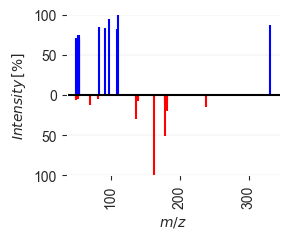

In [318]:
head_to_tail_plot(data_temp.iloc[4]['msms'], data_temp.iloc[2]['msms'],
                  # pmz1= data_temp.iloc[0]['reference_precursor_mz']
                  )

In [295]:
result_temp_high_entropy = result_temp[result_temp['entropy']>=0.75]

In [288]:
key_temp = result_temp_high_entropy.sort_values(by = 'ei_1', ascending=True).loc[1307]['key']

In [289]:
data_temp = string_search(library_crude, 'key', key_temp)

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

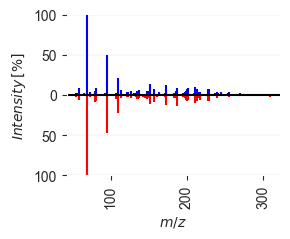

In [292]:
head_to_tail_plot(data_temp.iloc[1]['msms'], data_temp.iloc[0]['msms'],
                  # pmz1= data_temp.iloc[0]['reference_precursor_mz']
                  )

In [280]:
data_temp.iloc[0]['reference_formula']

'C30H48O3'

In [163]:
result_temp = result_temp[result_temp['entropy']>=0.75]

In [165]:
library_crude = library_crude[library_crude['key'].isin(result_temp['key'])]

In [169]:
library_reference = string_search(library_crude, 'conc', 1)
msms_composite = []
for index, row in tqdm(library_reference.iterrows(), total = len(library_reference)):
    data_temp = string_search(library_crude, 'key', row['key'])
    break
    # msms_composite.append()

  0%|          | 0/930 [00:00<?, ?it/s]


In [11]:
# pos_matched = pd.read_csv(os.path.join(master_dir, 'pos_matched.csv'))
# neg_matched = pd.read_csv(os.path.join(master_dir, 'neg_matched.csv'))
# all_matched = pd.concat([pos_matched, neg_matched], ignore_index=True)
# all_matched_unique=all_matched.copy()
# all_matched_unique['key']=all_matched_unique['reference_smiles']+all_matched_unique['reference_adduct']
# all_matched_unique.drop_duplicates(subset=['key'], inplace=True)
#
# import toolsets.denoising_related_functions as de
# all_matched = pd.concat([pos_matched, neg_matched], ignore_index=True)
# all_matched['reference_adduct'].value_counts()
# ms1 = []
# msms = []
# for index, row in all_matched.iterrows():
#     ms1.append(so.convert_msdial_to_string(row['MS1 isotopes']))
#     msms.append(so.convert_msdial_to_string(row['MSMS spectrum']))
# all_matched.insert(14, 'ms1', ms1)
# all_matched.insert(15, 'msms', msms)
# all_matched.drop(columns=['Isotope', 'MS1 isotopes','MSMS spectrum'], inplace=True)

In [13]:
# all_matched.to_csv(os.path.join(master_dir, 'all_matched.csv'), index = False)

In [52]:
all_matched = pd.read_csv(os.path.join(master_dir, 'all_matched.csv'))

In [53]:
msms = []
for index, row in tqdm(all_matched.iterrows(), total= len(all_matched)):
    msms.append(so.bin_spectrum(row['msms']))
all_matched['msms']=msms

100%|██████████| 11823/11823 [00:04<00:00, 2440.29it/s]


In [54]:
reference_db_sorted = pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/formula_db/formulaDB_sorted.csv')

In [55]:
import toolsets.denoising_related_functions as de

In [56]:
msms_d =[]
ei = []
for index, row in tqdm(all_matched.iterrows(), total= len(all_matched)):
    result_temp = de.denoise_h(row['msms'],row['reference_smiles'], row['reference_adduct'], reference_db_sorted=reference_db_sorted, mass_error=0.005)
    msms_d.append(result_temp[0])
    ei.append(result_temp[1])
    # break
    # state.append(state_temp)
    # mass_error.append(mass_error_temp)
all_matched['msms_denoised']=msms_d
all_matched['ei']=ei

100%|██████████| 11823/11823 [22:39<00:00,  8.69it/s] 


In [57]:
spectral_entropy = []
normalized_entropy = []
for index, row in all_matched.iterrows():
    if row['msms']==row['msms']:
        normalized_entropy.append(so.normalized_entropy(so.truncate_msms(row['msms'], max_mz=row['reference_precursor_mz']-1.6)))
    else:
        normalized_entropy.append(np.NAN)
    if row['msms_denoised']==row['msms_denoised']:
        spectral_entropy.append(so.spectral_entropy(so.truncate_msms(row['msms_denoised'], max_mz=row['reference_precursor_mz']-1.6)))
    else:
        spectral_entropy.append(-1)
all_matched['normalized_entropy']= normalized_entropy
all_matched['spectral_entropy']= spectral_entropy

In [58]:
all_matched.to_csv(os.path.join(master_dir, 'all_matched_20231026.csv'), index = False)

# let's continue tomorrow

In [31]:
all_matched=pd.read_csv(os.path.join(master_dir, 'all_matched_20231026.csv'))
from toolsets.denoising_related_functions import denoise_bp, denoise_dyn
msms_denoised_bp = []
msms_denoised_dyn = []
for index, row in tqdm(all_matched.iterrows(), total = len(all_matched)):
    msms_denoised_bp.append(denoise_bp(row['msms'], precursor_mz=row['reference_precursor_mz'], threshold=1))
    msms_denoised_dyn.append(denoise_dyn(row['msms'], precursor_mz=row['reference_precursor_mz']))
all_matched['msms_denoised_bp']=msms_denoised_bp
all_matched['msms_denoised_dyn']=msms_denoised_dyn
library = string_search(all_matched, 'conc', 1)
library_high_quality = library.query('ei >=90 and spectral_entropy>0.5')
bad_df = library.index.isin(library_high_quality.index.tolist())
library_bad_quality= library[~bad_df]
mrm = {}
for i in range(1,4):
    mrm[i]=[]
mrm_sum = []
for index, row in library_high_quality.iterrows():
    row_sum = 0
    for i in range(1,4):
        result_temp = so.get_top_n(row['msms_denoised'],i, row['reference_precursor_mz'])
        mrm[i].append(result_temp)
        row_sum += result_temp[1]
    mrm_sum.append(row_sum)
for i in range(1,4):
    col_name = 'mrm_'+str(i)
    library_high_quality[col_name]=mrm[i]
library_high_quality['mrm_sum']=mrm_sum

100%|██████████| 11823/11823 [00:02<00:00, 4223.89it/s]


In [32]:
dilutions = string_search(all_matched, 'conc', 1, reverse=True)
library_high_quality['key']=library_high_quality['reference_name']+library_high_quality['ce'].astype(str)+library_high_quality['reference_adduct']
dilutions['key']=dilutions['reference_name']+dilutions['ce'].astype(str)+dilutions['reference_adduct']


mrm_dilutions = pd.DataFrame()
mrm_d = {}
for i in range(1,4):
    mrm_d[i]=[]
for conc in dilutions['conc'].unique():
    current_dilu = string_search(dilutions, 'conc', conc)
    for index, row in current_dilu.iterrows():
        library_instance = string_search(library_high_quality, 'key', row['key'])
        if len(library_instance)>0:
            for mrm_i in range(1,4):
                col_name = 'mrm_'+str(mrm_i)
                if  library_instance.iloc[0][col_name] ==  library_instance.iloc[0][col_name]:
                    mrm_d[mrm_i].append(so.search_mrm_ions(row['msms'], library_instance.iloc[0][col_name][0]))
                else:
                    mrm_d[mrm_i].append((np.NAN, 0))
            mrm_dilutions= pd.concat([mrm_dilutions, pd.DataFrame([row])], ignore_index=True)
for i in range(1,4):
    col_name = 'mrm_raw_'+str(i)
    mrm_dilutions[col_name]=mrm_d[i]
mrm_raw_intensity_sum =[]
for index,row in mrm_dilutions.iterrows():
    raw_sum_temp = 0
    for i in range(1,4):
        col_name = 'mrm_raw_'+str(i)
        raw_sum_temp = raw_sum_temp+row[col_name][1]
    mrm_raw_intensity_sum.append(raw_sum_temp)
mrm_dilutions['mrm_raw_intensity_sum']=mrm_raw_intensity_sum

In [33]:
mrm_validated = pd.DataFrame()
count = 0
ratio1_2 = []
for index, row in mrm_dilutions.iterrows():
    if row['mrm_raw_1'][1]>0:
        count = count+1
        mrm_validated = pd.concat([mrm_validated, pd.DataFrame([row])],ignore_index=True)

In [34]:
from toolsets.flash_entropy_helper import flash_entropy_simple
es_raw = []
es_denoised = []
es_dyn = []
es_threshod = []
ratio = []
reference_msms = []
for index, row in tqdm(mrm_validated.iterrows(), total = len(mrm_validated)):
    identity = string_search(library_high_quality, 'key', row['key']).iloc[0]
    ratio.append(identity['mrm_2'][1]/identity['mrm_1'][1])
    # break
    es_raw.append(so.entropy_identity(msms1 = identity['msms_denoised'], msms2 = row['msms'], pmz = row['reference_precursor_mz']))
    es_denoised.append(so.entropy_identity(msms1 = identity['msms_denoised'], msms2 = row['msms_denoised'],pmz = row['reference_precursor_mz'] ))
    es_threshod.append(so.entropy_identity(msms1 = identity['msms_denoised'], msms2 = row['msms_denoised_bp'], pmz = row['reference_precursor_mz']))
    es_dyn.append(so.entropy_identity(msms1 = identity['msms_denoised'], msms2 = row['msms_denoised_dyn'], pmz = row['reference_precursor_mz']))
    reference_msms.append(identity['msms_denoised'])
    # break
mrm_validated['es_raw']= es_raw
mrm_validated['es_denoised']=es_denoised
mrm_validated['es_threshold']= es_threshod
mrm_validated['msms_reference']=reference_msms
mrm_validated['es_dyn']=es_dyn
mrm_validated['diff']=mrm_validated['es_denoised']-mrm_validated['es_raw']
# mrm_validated['ratio_library']=ratio
# print(len(mrm_validated[mrm_validated['es_denoised']>0.7])/len(mrm_validated))
# print(len(mrm_validated[mrm_validated['es_raw']>0.75])/len(mrm_validated))

100%|██████████| 6162/6162 [00:55<00:00, 111.54it/s]


In [35]:
mrm_temp = mrm_validated[mrm_validated['es_denoised']>0.75]

In [36]:
data_temp = mrm_temp.query('es_raw <=0.75')

In [17]:
data_temp['es_raw'].describe()

count    693.000000
mean       0.644219
std        0.100207
min        0.181889
25%        0.604158
50%        0.674306
75%        0.717549
max        0.749969
Name: es_raw, dtype: float64

In [18]:
data_temp['es_dyn'].describe()

count    693.000000
mean       0.664875
std        0.100210
min        0.185077
25%        0.630249
50%        0.695372
75%        0.734450
max        0.780288
Name: es_dyn, dtype: float64

In [19]:
data_temp['es_denoised'].describe()

count    693.000000
mean       0.827969
std        0.054489
min        0.750117
25%        0.783110
50%        0.817289
75%        0.863788
max        0.991060
Name: es_denoised, dtype: float64

In [21]:
(0.8279-0.664875)/0.644219

0.2530583543794889

In [53]:
def fx(x):
    return x*(-1)*np.log2(x)

In [67]:
lst = [0.5,0.2,0.1,0.1,0.05, 0.05]
sum = 0
for i in range(len(lst)):
    sum = sum+fx(lst[i])

In [68]:
sum

2.0609640474436812

In [ ]:
sns.kdeplot(matche_temp['ei'], label= concs[conc-1] , color = color[conc-1], clip = [0,100])

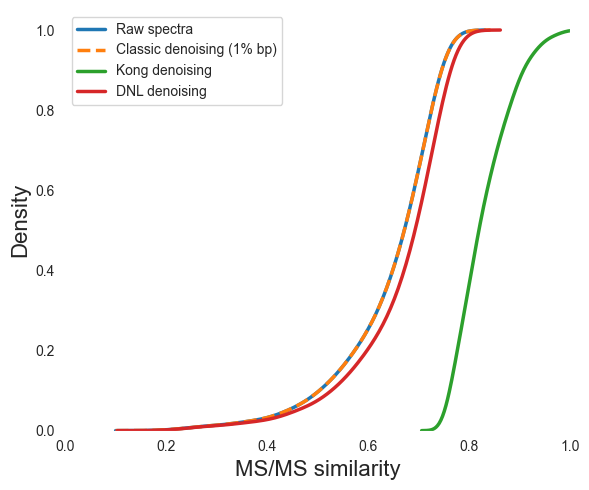

In [48]:
fig = plt.figure(figsize = (6, 5))#43
ax = fig.add_subplot()
data_temp = mrm_temp.query('es_raw <=0.75')
sns.kdeplot(data_temp['es_raw'], label = 'Raw spectra', linewidth=2.5, cumulative= True)
sns.kdeplot(data_temp['es_threshold'], label = 'Classic denoising (1% bp)', linestyle="--", linewidth = 2.5,cumulative= True)
sns.kdeplot(data_temp['es_denoised'], label = 'Kong denoising',linewidth = 2.5,cumulative= True)
sns.kdeplot(data_temp['es_dyn'], label = 'DNL denoising', linewidth =2.5,cumulative= True)
# plt.xlim(0, 100)
ax.set_xlabel('MS/MS similarity',size = 16)
# plt.vlines(x = 0.75, ymax=7, ymin = 0, colors='green', linestyles='dashed')
ax.set_ylabel('Density', size = 16)
ax.set_xlim(0, 1)
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
plt.grid(False)
ax.set_facecolor("white")
plt.legend(facecolor='white')
# plt.legend()
fig.tight_layout()
plt.savefig(os.path.join(figs_dir, 'entropy_improvement.png'))

In [128]:
n_peaks = []
label = []
for index, row in mrm_validated.iterrows():
    if row['msms_denoised']==row['msms_denoised']:
        for col in ['msms', 'msms_denoised_bp', 'msms_denoised', 'msms_denoised_dyn']:
            n_peaks.append(so.num_peaks(row[col]))
            label.append(col)


In [129]:
df = pd.DataFrame(zip(n_peaks, label),
                  columns=['n_peaks', 'label'])

In [140]:
col = 'msms'
data_temp = df[df['label']==col]
data_temp['n_peaks'].sum()

199074

In [141]:
col = 'msms_denoised'
data_temp = df[df['label']==col]
data_temp['n_peaks'].sum()

151936

In [142]:
col = 'msms_denoised_bp'
data_temp = df[df['label']==col]
data_temp['n_peaks'].sum()

176536

In [113]:
from PIL import Image

def convertImage(img, output_path):
    # img = Image.open(img_path)
    img = img.convert("RGBA")

    datas = img.getdata()

    newData = []

    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    img.save(os.path.join(output_path), "PNG")
    print("Successful")

# convertImage()

In [123]:
mol = Chem.MolFromSmiles(mrm_validated.loc[5862]['reference_smiles'])
tt = Chem.Draw.MolToImage(mol)
convertImage(tt, os.path.join(clean_noise_dir, '34di'+'.png'))

Successful


In [122]:
mrm_validated

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,mrm_raw_1,mrm_raw_2,mrm_raw_3,mrm_raw_intensity_sum,es_raw,es_denoised,es_threshold,msms_reference,es_dyn,diff
1019,SPERMIDINE,12,9,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,"(72.0811, 0.0811172910606855)","(84.08104, 0.01650927963499953)","(112.11276, 0.009506565138212257)",0.107133,0.262448,0.991060,0.265448,58.06564\t7068677.0\n70.06527\t519310.0\n72.08...,0.264521,0.728612
2215,SPERMIDINE,12,11,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,"(72.08109, 0.057280545379748075)","(84.08097, 0.01202935530001763)","(112.11237, 0.011469821928810704)",0.080780,0.216495,0.858263,0.216495,58.06564\t7068677.0\n70.06527\t519310.0\n72.08...,0.219372,0.641768
2986,Acetosyringone,6,5,35,196.073559,5.44,COc1cc(C(C)=O)cc(OC)c1O,C10H12O4,[M-H]-,195.066283,...,"(180.04352, 0.07322028375794805)","(165.01923, 0.029727023129003972)","(137.02461, 0)",0.102947,0.238903,0.879681,0.238903,55.04104\t7541.0\n55.06518\t5603.0\n67.01918\t...,0.243426,0.640778
919,Harmol Hydrochloride,6,10,65,198.079313,4.20,Cc1[nH]ccc2c1[nH]c1cc(=O)ccc12,C12H10N2O,[M-H]-,197.072037,...,"(182.04959, 0.05451019503546099)","(169.07739, 0)","(168.06966, 0)",0.054510,0.138105,0.730645,0.138105,99.02622\t18378.0\n154.05399\t243198.0\n168.06...,0.144908,0.592540
2244,SPERMIDINE,12,11,45,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,"(72.08108, 0.10841339254056427)","(112.11253, 0.02437444071116214)","(84.08084, 0.006040319448899995)",0.138828,0.322506,0.898603,0.322506,58.06565\t6589690.0\n64.08971\t481599.0\n72.08...,0.325851,0.576097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,Gitoxin,12,2,35,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M-H]-,779.422331,...,"(483.27673, 0.36082269066206757)","(613.34039, 0.1657073394832663)","(743.40436, 0.06840717814231377)",0.594937,0.976342,0.970884,0.976873,111.04547\t287349.0\n127.04039\t7652.0\n129.05...,0.977453,-0.005458
5162,Gitoxin,12,3,45,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M+FA-H]-,825.427808,...,"(483.2767, 0.4627321495933439)","(353.21341, 0.17593178746347501)","(613.34058, 0.08364278774436391)",0.722307,0.960456,0.954887,0.960359,122.03686\t113892.0\n123.04453\t83940.0\n127.0...,0.963774,-0.005569
387,Tomatine,12,6,35,1033.545759,6.39,CC1CCC2(NC1)OC1CC3C4CCC5CC(OC6OC(CO)C(OC7OC(CO...,C50H83NO21,[M+H]+,1034.553035,...,"(85.02865, 0.11219743776747258)","(1016.54803, 0.08833733538825667)","(255.21121, 0.10826189263942976)",0.308797,0.881011,0.850774,0.881011,73.02866\t1872458.0\n79.05486\t79580.0\n81.033...,0.894835,-0.030237
3885,Gitoxin,12,4,35,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M-H]-,779.422331,...,"(483.27676, 0.4076123614543115)","(613.3407, 0.15779067027981844)","(743.40826, 0.05309784017720078)",0.618501,0.916205,0.884802,0.917999,111.04547\t287349.0\n127.04039\t7652.0\n129.05...,0.922159,-0.031403


In [144]:
tt=(mrm_validated[mrm_validated['es_raw']<0.75])

In [145]:
len(tt)

2061

In [171]:
len(tt[tt['es_denoised']<0.75])

1112

In [161]:
len(tt[tt['es_dyn']<0.75])

1961

In [160]:
len(tt[tt['es_threshold']<0.75])

2059

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

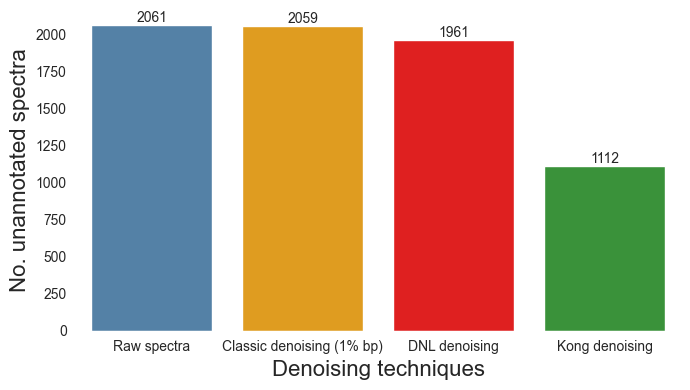

In [7]:
colors = ['steelblue', 'orange', 'red', '#2CA02C']
fig = plt.figure(figsize = (7, 4))#43
ax = fig.add_subplot()
x = ['Raw spectra','Classic denoising (1% bp)','DNL denoising', 'Kong denoising']
y = [2061, 2059,1961,1112]
sns.barplot(x =x, y = y,palette=colors)
for i in ax.containers:
    ax.bar_label(i,)
# sns.kdeplot(data_temp['es_raw'], label = 'Raw spectra', linewidth=2.5)
# sns.kdeplot(data_temp['es_threshold'], label = 'Classic denoising (1% bp)', linestyle="--", linewidth = 2.5)
# sns.kdeplot(data_temp['es_denoised'], label = 'Kong denoising',linewidth = 2.5)
# sns.kdeplot(data_temp['es_dyn'], label = 'DNL denoising', linewidth =2.5)
# plt.xlim(0, 100)
ax.set_xlabel('Denoising techniques',size = 16)
# plt.vlines(x = 0.75, ymax=7, ymin = 0, colors='green', linestyles='dashed')
ax.set_ylabel('No. unannotated spectra', size = 16)
# ax.set_xlim(0, 1)
# # sns.lineplot(x = range(1,14), y = ns_means)
# # sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# # plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
plt.grid(False)
ax.set_facecolor("none")
fig.tight_layout()
# plt.legend(facecolor='white')
plt.savefig(os.path.join(figs_dir, 'unannotation.png'), facecolor = 'White')

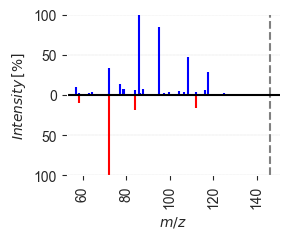

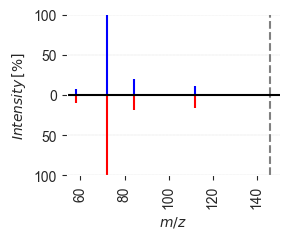

In [69]:
clean_noise_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/figs/clean_noise'
instance = mrm_validated.iloc[0]
# identity = string_search(library_high_quality, 'key', instance['key'])
# msms = so.bin_spectrum(identity.iloc[0]['msms_denoised'])
# mass, intensity = so.break_spectra(msms)
# ms2_plot(so.truncate_msms(so.bin_spectrum(instance['msms']), max_mz=instance['reference_precursor_mz']-1.6) , pmz1=instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_'+instance['key']+'_dilu_'+str(instance['conc'])+'.png')
#          )
# ms2_plot(so.truncate_msms(so.bin_spectrum(instance['msms_denoised']), max_mz=instance['reference_precursor_mz']-1.6) , pmz1=instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_denoised'+instance['key']+'_dilu_'+str(instance['conc'])+'.png')
#          )
# # ms2_plot(instance['msms_denoised'], pmz1=instance['reference_precursor_mz'])
# ms2_plot(so.truncate_msms(so.bin_spectrum(identity.iloc[0]['msms_denoised']),max_mz=instance['reference_precursor_mz']-1.6), pmz1 = instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_'+identity.iloc[0]['key']+'_dilu_'+str(identity.iloc[0]['conc'])+'.png')
#          )
head_to_tail_plot(instance['msms'], instance['msms_reference'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(clean_noise_dir, 'demo_fig_raw_refer'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_raw'])+'.png')
                  )
head_to_tail_plot(instance['msms_denoised'], instance['msms_reference'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(clean_noise_dir, 'demo_fig_denoised_refere'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_denoised'])+'.png')
                  )
mol = Chem.MolFromSmiles(instance['reference_smiles'])
# Chem.Draw.MolToFile(mol, filename = os.path.join(clean_noise_dir, instance['reference_name']+'.png'))

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

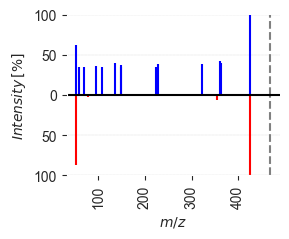

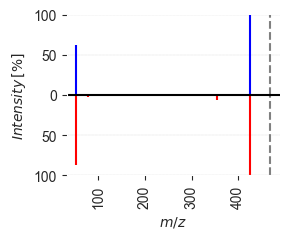

In [178]:
clean_noise_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/figs/clean_noise'
instance = mrm_validated.loc[4345]
# identity = string_search(library_high_quality, 'key', instance['key'])
# msms = so.bin_spectrum(identity.iloc[0]['msms_denoised'])
# mass, intensity = so.break_spectra(msms)
# ms2_plot(so.truncate_msms(so.bin_spectrum(instance['msms']), max_mz=instance['reference_precursor_mz']-1.6) , pmz1=instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_'+instance['key']+'_dilu_'+str(instance['conc'])+'.png')
#          )
# ms2_plot(so.truncate_msms(so.bin_spectrum(instance['msms_denoised']), max_mz=instance['reference_precursor_mz']-1.6) , pmz1=instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_denoised'+instance['key']+'_dilu_'+str(instance['conc'])+'.png')
#          )
# # ms2_plot(instance['msms_denoised'], pmz1=instance['reference_precursor_mz'])
# ms2_plot(so.truncate_msms(so.bin_spectrum(identity.iloc[0]['msms_denoised']),max_mz=instance['reference_precursor_mz']-1.6), pmz1 = instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_'+identity.iloc[0]['key']+'_dilu_'+str(identity.iloc[0]['conc'])+'.png')
#          )
head_to_tail_plot(instance['msms'], instance['msms_reference'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(clean_noise_dir, instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_raw'])+'.png')
                  )
head_to_tail_plot(instance['msms_denoised'], instance['msms_reference'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(clean_noise_dir, instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_denoised'])+'.png')
                  )


In [176]:
mrm_validated

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,mrm_raw_1,mrm_raw_2,mrm_raw_3,mrm_raw_intensity_sum,es_raw,es_denoised,es_threshold,msms_reference,es_dyn,diff
1019,SPERMIDINE,12,9,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,"(72.0811, 0.0811172910606855)","(84.08104, 0.01650927963499953)","(112.11276, 0.009506565138212257)",0.107133,0.262448,0.991060,0.265448,58.06564\t7068677.0\n70.06527\t519310.0\n72.08...,0.264521,0.728612
2215,SPERMIDINE,12,11,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,"(72.08109, 0.057280545379748075)","(84.08097, 0.01202935530001763)","(112.11237, 0.011469821928810704)",0.080780,0.216495,0.858263,0.216495,58.06564\t7068677.0\n70.06527\t519310.0\n72.08...,0.219372,0.641768
2986,Acetosyringone,6,5,35,196.073559,5.44,COc1cc(C(C)=O)cc(OC)c1O,C10H12O4,[M-H]-,195.066283,...,"(180.04352, 0.07322028375794805)","(165.01923, 0.029727023129003972)","(137.02461, 0)",0.102947,0.238903,0.879681,0.238903,55.04104\t7541.0\n55.06518\t5603.0\n67.01918\t...,0.243426,0.640778
919,Harmol Hydrochloride,6,10,65,198.079313,4.20,Cc1[nH]ccc2c1[nH]c1cc(=O)ccc12,C12H10N2O,[M-H]-,197.072037,...,"(182.04959, 0.05451019503546099)","(169.07739, 0)","(168.06966, 0)",0.054510,0.138105,0.730645,0.138105,99.02622\t18378.0\n154.05399\t243198.0\n168.06...,0.144908,0.592540
2244,SPERMIDINE,12,11,45,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,"(72.08108, 0.10841339254056427)","(112.11253, 0.02437444071116214)","(84.08084, 0.006040319448899995)",0.138828,0.322506,0.898603,0.322506,58.06565\t6589690.0\n64.08971\t481599.0\n72.08...,0.325851,0.576097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,Gitoxin,12,2,35,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M-H]-,779.422331,...,"(483.27673, 0.36082269066206757)","(613.34039, 0.1657073394832663)","(743.40436, 0.06840717814231377)",0.594937,0.976342,0.970884,0.976873,111.04547\t287349.0\n127.04039\t7652.0\n129.05...,0.977453,-0.005458
5162,Gitoxin,12,3,45,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M+FA-H]-,825.427808,...,"(483.2767, 0.4627321495933439)","(353.21341, 0.17593178746347501)","(613.34058, 0.08364278774436391)",0.722307,0.960456,0.954887,0.960359,122.03686\t113892.0\n123.04453\t83940.0\n127.0...,0.963774,-0.005569
387,Tomatine,12,6,35,1033.545759,6.39,CC1CCC2(NC1)OC1CC3C4CCC5CC(OC6OC(CO)C(OC7OC(CO...,C50H83NO21,[M+H]+,1034.553035,...,"(85.02865, 0.11219743776747258)","(1016.54803, 0.08833733538825667)","(255.21121, 0.10826189263942976)",0.308797,0.881011,0.850774,0.881011,73.02866\t1872458.0\n79.05486\t79580.0\n81.033...,0.894835,-0.030237
3885,Gitoxin,12,4,35,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M-H]-,779.422331,...,"(483.27676, 0.4076123614543115)","(613.3407, 0.15779067027981844)","(743.40826, 0.05309784017720078)",0.618501,0.916205,0.884802,0.917999,111.04547\t287349.0\n127.04039\t7652.0\n129.05...,0.922159,-0.031403


In [ ]:
# fig = plt.figure(figsize = (6, 5))#43
# ax = fig.add_subplot()
# #
# concs = ['250 uM', '100 uM', '50 uM','20 uM', '5 uM', '2 uM', '1 uM', '0.5 uM', '0.2 uM',
#          '0.1 uM', '0.05 uM',
#          '0.02 uM', '0.01 uM']
# for col in ['es_raw', 'es_denoised']:
#     sns.kdeplot(mrm_validated[col])
# # plt.xlim(0, 100)
# # ax.set_xlabel('Explained intensity (%)',size = 16)
# # ax.set_ylabel('Relative density', size = 16)
# # sns.lineplot(x = range(1,14), y = ns_means)
# # sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# # plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
# plt.grid(False)
# ax.set_facecolor("white")
# plt.legend(facecolor='white')
# # plt.legend()
# fig.tight_layout()
# # plt.savefig(os.path.join(figs_dir, 'ei_across_concs.png'))

In [15]:
# library_good_quality = library[library['ei']>=90]
# library_bad_quality = library[library['ei']<90]

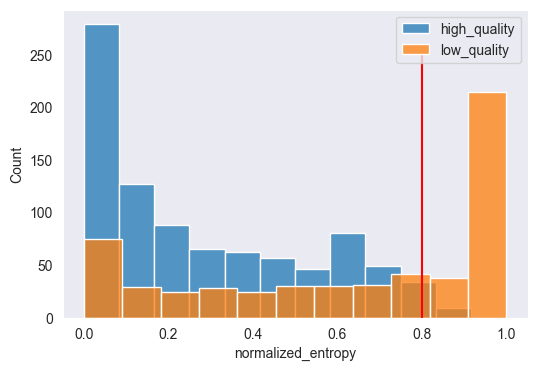

In [70]:
# fig = plt.figure(figsize = (6, 4))#43
# ax = fig.add_subplot()
# sns.histplot(library_good_quality['normalized_entropy'], label = 'high_quality')
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
# plt.grid(False)
# plt.legend()
# plt.savefig(os.path.join(figs_dir, 'library_high_low_quality.png'))

In [74]:
def check_quality(all_matched, conc,threshold=90):
    conc_temp = string_search(all_matched, 'conc', conc)
    # return(len(conc_tem[conc_temp['ei']>=threshold])/len(conc_temp))
    return conc_temp['ei'].mean(), conc_temp['normalized_entropy'].mean()p

In [79]:
ei_means = []
ns_means = []
for conc in range(1,14):
    # print(conc)
    ei_mean, normalized_entropy_mean = check_quality(all_matched, conc)
    ei_means.append(ei_mean)
    ns_means.append(normalized_entropy_mean)

In [14]:

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]
def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


In [15]:
color2 = '#61D837'
color1 = '#CE5F5A'
color = get_color_gradient(color1, color2, 13)

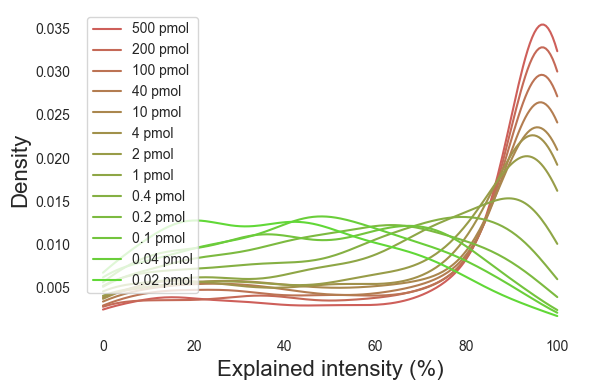

In [28]:
fig = plt.figure(figsize = (6, 4))#43
ax = fig.add_subplot()
#
concs = ['500 pmol', '200 pmol', '100 pmol','40 pmol', '10 pmol', '4 pmol', '2 pmol', '1 pmol', '0.4 pmol',
         '0.2 pmol', '0.1 pmol',
         '0.04 pmol', '0.02 pmol']
for conc in range(1,14):
    matche_temp = string_search(all_matched, 'conc', conc)
    # sns.displot(matche_temp['ei'], kind="ecdf",label= concs[conc-1] , color = color[conc-1])
    sns.kdeplot(matche_temp['ei'], label= concs[conc-1] , color = color[conc-1], clip = [0,100])
# plt.xlim(0, 100)
ax.set_xlabel('Explained intensity (%)',size = 16)
ax.set_ylabel('Density', size = 16)
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
plt.grid(False)
ax.set_facecolor("white")
plt.legend(facecolor='white')
# plt.legend()
fig.tight_layout()
plt.savefig(os.path.join(figs_dir, 'ei_across_concs.png'))

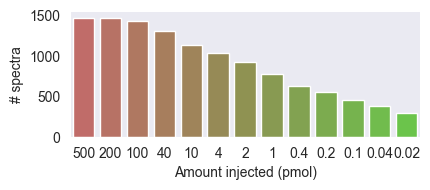

In [25]:
# fig = plt.figure(figsize = (20,10))#43
# ax = fig.add_subplot()
# fig, ax = plt.subplots(figsize = (12, 8))
concs = ['500', '200', '100','40', '10', '4', '2', '1', '0.4',
         '0.2', '0.1',
         '0.04', '0.02']
# n_matche = []
# for conc in range(1,14):
#     matche_temp = string_search(all_matched, 'conc', conc)
#     n_matche.append(len(matche_temp))
ax=sns.catplot(data = all_matched,x = 'conc', kind="count", palette=color,height=2, aspect=2.2)
sns.set_style(rc = {'axes.facecolor': 'white'})
ax.set_xticklabels(concs)
ax.set_xlabels('Amount injected (pmol)')
ax.set_ylabels('# spectra')
# plt.xlim(0, 100)
# sns.set_xlabel('Concentration')
# sns.set_ylabel('# spectra')
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
plt.grid(False)
# fig.set_facecolor('white')
# plt.legend(facecolor='white')
# plt.legend()
fig.tight_layout()
plt.savefig(os.path.join(figs_dir, 'n_spectra.png'))

# 20231002

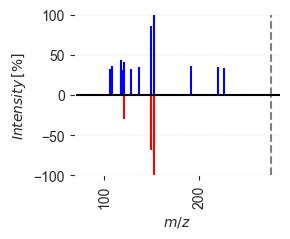

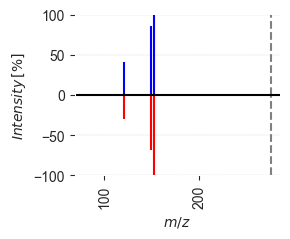

In [536]:
clean_noise_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/figs/clean_noise'
instance = mrm_dilutions_validated_matched.loc[6845]
identity = string_search(library_high_quality, 'key', instance['key'])
msms = so.bin_spectrum(identity.iloc[0]['msms_denoised'])
mass, intensity = so.break_spectra(msms)
# ms2_plot(so.truncate_msms(so.bin_spectrum(instance['msms']), max_mz=instance['reference_precursor_mz']-1.6) , pmz1=instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_'+instance['key']+'_dilu_'+str(instance['conc'])+'.png')
#          )
# ms2_plot(so.truncate_msms(so.bin_spectrum(instance['msms_denoised']), max_mz=instance['reference_precursor_mz']-1.6) , pmz1=instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_denoised'+instance['key']+'_dilu_'+str(instance['conc'])+'.png')
#          )
# # ms2_plot(instance['msms_denoised'], pmz1=instance['reference_precursor_mz'])
# ms2_plot(so.truncate_msms(so.bin_spectrum(identity.iloc[0]['msms_denoised']),max_mz=instance['reference_precursor_mz']-1.6), pmz1 = instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_'+identity.iloc[0]['key']+'_dilu_'+str(identity.iloc[0]['conc'])+'.png')
#          )
head_to_tail_plot(instance['msms'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(clean_noise_dir, 'demo_fig_raw_refer'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_raw'])+'.png')
                  )
head_to_tail_plot(instance['msms_denoised'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(clean_noise_dir, 'demo_fig_denoised_refere'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_denoised'])+'.png')
                  )
mol = Chem.MolFromSmiles(instance['reference_smiles'])
Chem.Draw.MolToFile(mol, filename = os.path.join(clean_noise_dir, instance['reference_name']+'.png'))

In [ ]:
instance = mrm_dilutions_validated_matched.loc[1193]
identity = string_search(library_high_quality, 'key', instance['key'])
msms = so.bin_spectrum(identity.iloc[0]['msms_denoised'])
mass, intensity = so.break_spectra(msms)
# ms2_plot(so.truncate_msms(so.bin_spectrum(instance['msms']), max_mz=instance['reference_precursor_mz']-1.6) , pmz1=instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_'+instance['key']+'_dilu_'+str(instance['conc'])+'.png')
#          )
# ms2_plot(so.truncate_msms(so.bin_spectrum(instance['msms_denoised']), max_mz=instance['reference_precursor_mz']-1.6) , pmz1=instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_denoised'+instance['key']+'_dilu_'+str(instance['conc'])+'.png')
#          )
# # ms2_plot(instance['msms_denoised'], pmz1=instance['reference_precursor_mz'])
# ms2_plot(so.truncate_msms(so.bin_spectrum(identity.iloc[0]['msms_denoised']),max_mz=instance['reference_precursor_mz']-1.6), pmz1 = instance['reference_precursor_mz'],lower=np.min(mass), upper=instance['reference_precursor_mz']+10,
#          savepath= os.path.join(clean_noise_dir, 'demo_fig_'+identity.iloc[0]['key']+'_dilu_'+str(identity.iloc[0]['conc'])+'.png')
#          )
head_to_tail_plot(instance['msms'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(clean_noise_dir, 'demo_fig_raw_refer'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_raw'])+'.png')
                  )
head_to_tail_plot(instance['msms_denoised'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(clean_noise_dir, 'demo_fig_denoised_refere'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_denoised'])+'.png')
                  )

In [265]:
smile = 'CCOC1=CC=CC(=C1)C(=O)C2=C(C(=C(C=C2)O)O)O'
mol = Chem.MolFromSmiles(instance['reference_smiles'])
Chem.Draw.MolToFile(mol, filename = os.path.join(clean_noise_dir, instance['reference_name']+'.png'))

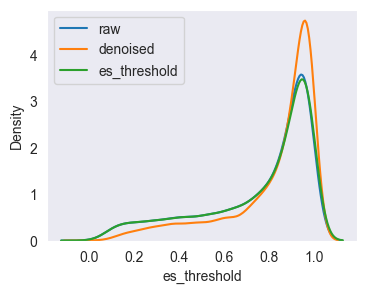

In [82]:
fig = plt.figure(figsize = (4, 3))#43
ax = fig.add_subplot()
#
sns.distplot(mrm_dilutions_validated['es_raw'], label= 'raw', hist=False)
sns.distplot(mrm_dilutions_validated['es_denoised'], label= 'denoised', hist=False)
sns.distplot(mrm_dilutions_validated['es_threshold'], label= 'es_threshold', hist=False)
# for conc in range(2,14):
#     matche_temp = string_search(mrm_dilutions, 'conc', conc)
#
#     sns.distplot(matche_temp['ei'], label= 'dilution_'+str(conc), hist=False)
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=1.8, color = 'red')
plt.grid(False)
plt.legend()

In [1]:
mrm_dilutions_validated

NameError: name 'mrm_dilutions_validated' is not defined

In [1]:
from toolsets.spectra_plotter import ms2_clean_noise

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

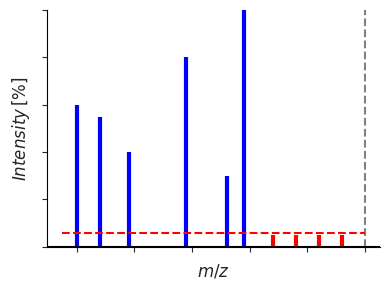

In [210]:
mass1 = [100,109,119,129,104, 126]
intensity1 = [60, 40, 80, 100,55,30]
mass2 = [134,138,142, 146]
intensity2 = [ 5,5,5,5]
pmz = 150
msms1 = so.pack_spectra(mass1, intensity1)
msms2 = so.pack_spectra(mass2, intensity2)

ms2_clean_noise(msms2, msms1, pmz1 = pmz,hline=6,
                savepath=os.path.join(figs_dir, 'denoising_trheshold.png')
                )

In [3]:
import toolsets.spectra_operations as so

In [7]:
import os

In [8]:
mass1 = [100,109,119,129,134, 142]
intensity1 = [60, 40, 80, 100,5,5]
mass2 = [104, 126,138, 146]
intensity2 = [55,30, 5,5,]
pmz = 150
msms1 = so.pack_spectra(mass1, intensity1)
msms2 = so.pack_spectra(mass2, intensity2)

ms2_clean_noise(msms2, msms1, pmz1 = pmz,
                savepath=os.path.join(figs_dir, 'denoising_demo_figure.png')
                )

NameError: name 'figs_dir' is not defined

In [302]:
mrm_validated

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,msms_denoised,ei,normalized_entropy,spectral_entropy,msms_denoised_bp,key,mrm_raw_1,mrm_raw_2,mrm_raw_3,mrm_raw_intensity_sum
0,Hesperidin,6,6,65,610.189770,5.77,COc1ccc(C2CC(=O)c3c(O)cc(OC4OC(COC5OC(C)C(O)C(...,C28H34O15,[M+H]+,611.197046,...,52.0949\t4721.0\n57.034\t8462.0\n58.99925\t557...,94.39671,0.541941,2.499081,52.0949\t4721.0\n57.034\t8462.0\n58.99925\t557...,Hesperidin65[M+H]+,"(153.0188, 0.14015415076696966)","(177.05528, 0.16442911237576263)","(71.04947, 0.11185330042309674)",0.416437
1,4-Hydroxy-6-Methylpyran-2-One,6,6,65,126.031694,3.61,Cc1cc(O)cc(=O)o1,C6H6O3,[M+H]+,127.038970,...,53.03918\t12737.0\n57.034\t5646.0\n65.03899\t1...,91.60141,0.419060,2.072710,51.03158\t4495.0\n53.03918\t12737.0\n54.38546\...,4-Hydroxy-6-Methylpyran-2-One65[M+H]+,"(99.04444, 0.3088654252952872)","(71.04951, 0.14384050405367374)","(68.99738, 0.06251645528248613)",0.515222
2,Acetosyringone,6,6,65,196.073559,5.42,COc1cc(C(C)=O)cc(OC)c1O,C10H12O4,[M+H]+,197.080835,...,82.99239\t8992.0\n95.04967\t14082.0\n123.04433...,87.76237,0.136925,1.014745,52.28019\t8468.0\n75.79913\t8184.0\n81.45593\t...,Acetosyringone65[M+H]+,"(140.04735, 0.6230292099714215)","(155.07094, 0.11380007920622517)","(123.04433, 0.054240208933177776)",0.791069
3,"3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin",6,6,65,274.084124,8.49,CCOc1cccc(C(=O)c2ccc(O)c(O)c2O)c1,C15H14O5,[M+H]+,275.091400,...,71.05319\t3454.0\n79.01817\t7126.0\n107.01289\...,96.39276,0.103764,1.332669,51.61005\t3474.0\n71.05319\t3454.0\n79.01817\t...,"3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin...","(153.01878, 0.44832188985451576)","(121.02877, 0.2716685072261968)","(149.06033, 0.1746905459259615)",0.894681
4,Piperonylic Acid,6,6,65,166.026609,5.87,O=C(O)c1ccc2c(c1)OCO2,C8H6O4,[M+H]+,167.033885,...,65.03881\t8956.0\n79.02135\t6056.0\n93.0337\t7...,51.23703,0.536799,1.705243,62.99045\t3163.0\n65.03881\t8956.0\n66.08633\t...,Piperonylic Acid65[M+H]+,"(111.04451, 0.20975894412549667)","(93.0337, 0.06591492246565232)","(65.03881, 0.07685640484342954)",0.352530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,Alpha-Mangostin,7,12,35,410.172939,13.12,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,C24H26O6,[M-H]-,409.165663,...,159.00528\t5188.0\n203.1082\t6162.0\n339.0881\...,80.34488,0.395613,1.441369,56.96497\t3795.0\n79.23924\t4342.0\n113.64709\...,Alpha-Mangostin35[M-H]-,"(351.08887, 0.38515702646399874)","(339.0881, 0.14736848015901982)","(377.14175, 0.12609284017721278)",0.658618
6158,Isoliquiritigenin,7,12,35,256.073559,7.88,O=C(C=Cc1ccc(O)cc1)c1ccc(O)cc1O,C15H12O4,[M-H]-,255.066283,...,78.04071\t2979.0\n91.01958\t5802.0\n119.05052\...,77.67793,0.391916,1.290832,54.68072\t3176.0\n67.45937\t3701.0\n77.71555\t...,Isoliquiritigenin35[M-H]-,"(119.05052, 0.3366667466046348)","(135.00919, 0.21443359952676722)","(153.01978, 0.11322413806885856)",0.664324
6159,Mangiferin,7,12,35,422.084911,4.29,O=c1c2cc(O)c(O)cc2oc2cc(O)c(C3OC(CO)C(O)C(O)C3...,C19H18O11,[M-H]-,421.077635,...,120.01727\t5487.0\n259.02612\t6400.0\n301.0369...,49.65613,0.705975,0.897249,53.55787\t3717.0\n63.44184\t4062.0\n74.18548\t...,Mangiferin35[M-H]-,"(301.03696, 0.3196081934024056)","(331.04709, 0)","(259.02612, 0.09527212099559366)",0.414880
6160,ONONETIN,9,12,45,258.089209,8.83,COc1ccc(CC(=O)c2ccc(O)cc2O)cc1,C15H14O4,[M-H]-,257.081933,...,54.96645\t3520.0\n79.02731\t4140.0\n107.01408\...,64.08128,0.772316,2.043375,54.96645\t3520.0\n79.02731\t4140.0\n84.5222\t7...,ONONETIN45[M-H]-,"(136.01688, 0.1694245218579235)","(135.00929, 0.11409665300546448)","(107.01408, 0.07283128415300547)",0.356352


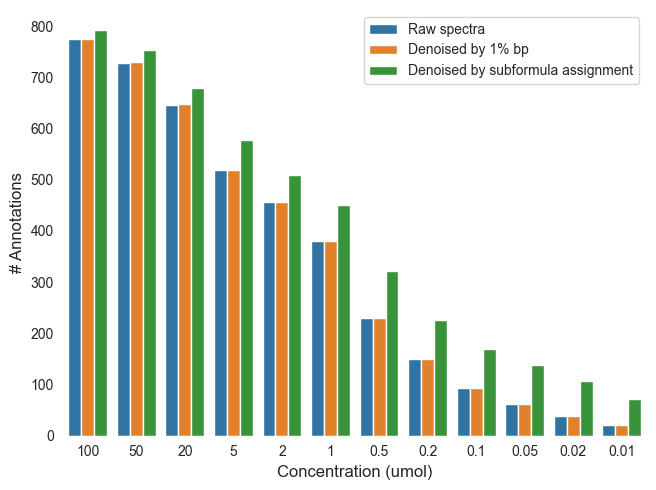

In [537]:
fig = plt.figure(figsize = (6.66, 5))#43
ax = fig.add_subplot()
#
method = ['es_raw','es_threshold', 'es_denoised']
hits = []
hits_percent = []
concs = []
methods = []
for conc in range(2,14):
    data_temp = string_search(mrm_validated, 'conc', conc)
    for m in method:
        # if m == 'es_raw':
        #     base_n = len(data_temp[data_temp[m]>0.8])
        # if m == 'es_denoised':
        #     hits_percent.append((len(data_temp[data_temp[m]>0.8])-base_n))
        # if m == 'es_threshold':
        #     hits_percent.append((len(data_temp[data_temp[m]>0.8])-base_n))

        hits.append(len(data_temp[data_temp[m]>0.75]))
        # concs.append(conc)
        # methods.append(m)
conc_umol=[]
denoised_methods = []

for umol in [100,50,20,5,2,1,0.5,0.2, 0.1, 0.05, 0.02, 0.01]:
    conc_umol.extend([umol]*3)
    # denoised_methods.extend([
    #                          'annotation increment: denoised over raw',
    #     'annotation increment: bp over raw',
    #
    # ])
    denoised_methods.extend(['Raw spectra',
                             'Denoised by 1% bp',
                             'Denoised by subformula assignment'  ])
sns.barplot( x=conc_umol, y=hits, hue=denoised_methods, order = [100,50,20,5,2,1,0.5,0.2, 0.1, 0.05, 0.02, 0.01])
ax.set_xlabel('Concentration (umol)', size = 12)
ax.set_ylabel('# Annotations', size = 12)
# for col in ['es_raw','es_threshold', 'es_denoised']:
#     n_hit = len(mrm_dilutions_validated[mrm_dilutions_validated[col]>0.75])
#     hits.append(n_hit)
# sns.barplot(x = methods, y = hits, legend = 'brief')
# ax.set_ylim(4000, 5000)
# sns.distplot(mrm_dilutions_validated['es_raw'], label= 'raw', hist=False)
# sns.distplot(mrm_dilutions_validated['es_denoised'], label= 'denoised', hist=False)
# sns.distplot(mrm_dilutions_validated['es_threshold'], label= 'es_threshold', hist=False)
# for conc in range(2,14):
#     matche_temp = string_search(mrm_dilutions, 'conc', conc)
#
#     sns.distplot(matche_temp['ei'], label= 'dilution_'+str(conc), hist=False)
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=1.8, color = 'red')
plt.grid(False)
plt.tight_layout()
plt.legend(facecolor='white')
ax.set_facecolor("white")
# ax.set_edgecolor('white')
plt.savefig(os.path.join(figs_dir, 'annotation.png'))
# plt.legend()

In [334]:
coe = 0.75
len(mrm_validated[mrm_validated['es_denoised']>=0.75])-len(mrm_validated[mrm_validated['es_raw']>=0.75])

417

In [539]:
library_high_quality.sort_values(by = 'normalized_entropy', ascending=False, inplace=True)

In [560]:
library_bad_quality_low_ei = library_bad_quality[library_bad_quality['ei']<90]

In [561]:
library_bad_quality_low_ei.sort_values(by = 'normalized_entropy', ascending=True, inplace=True)

In [562]:
library_bad_quality_low_ei

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,Precursor m/z,Height,ms1,msms,recovery_percent(%),msms_denoised,ei,normalized_entropy,spectral_entropy,msms_denoised_bp
992,Betulinic Acid,7,1,35,456.360345,13.38,C=C(C)C1CCC2(C(=O)O)CCC3(C)C(CCC4C5(C)CCC(O)C(...,C30H48O3,[M+FA-H]-,501.358546,...,501.3600,4704389.5,501.35999\t4767312\n502.36337\t1747026\n502.46...,50.59724\t43011.0\n57.22478\t4207.0\n62.31267\...,100.000000,79.13482\t4733.0\n193.09151\t6007.0\n455.35474...,89.19569,0.003154,0.081460,50.59724\t43011.0\n455.35474\t776940.0
831,Alpha-Hydroxydeoxycholic Acid,3,1,35,392.292660,10.56,CC(CCC(=O)O)C1CCC2C3CC(O)C4CC(O)CCC4(C)C3CCC12C,C24H40O4,[M+FA-H]-,437.290861,...,437.2918,1746617.0,437.19797\t36960\n437.29184\t2213645\n438.2019...,51.03485\t4439.0\n56.35921\t4129.0\n80.18839\t...,86.666667,365.30286\t6363.0\n391.28641\t446361.0,89.00921,0.004963,0.073897,98.581\t4524.0\n147.26221\t5591.0\n365.30286\t...
1394,MADECASSIC ACID,9,1,35,504.345089,8.77,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CC(O)C(O)C(C...,C30H48O6,[M+Cl]-,539.314491,...,539.3159,11848058.0,539.18744\t339100\n539.31592\t14127346\n540.19...,52.31009\t5326.0\n55.92933\t32048.0\n61.18254\...,95.000000,52.31009\t5326.0\n299.09619\t6090.0\n503.33978...,88.68828,0.005489,0.111692,55.92933\t32048.0\n63.05148\t6218.0\n117.34309...
840,Enoxolone,3,1,35,470.339610,12.19,CC1(C(=O)O)CCC2(C)CCC3(C)C(=CC(=O)C4C5(C)CCC(O...,C30H46O4,[M+FA-H]-,515.337811,...,515.3389,19166272.0,515.17249\t225648\n515.33887\t23307082\n516.32...,52.15063\t114696.0\n52.85962\t10466.0\n53.0753...,86.666667,68.07954\t11226.0\n268.10822\t13109.0\n355.134...,88.37487,0.006147,0.241725,52.15063\t114696.0\n425.34293\t59404.0\n469.33...
619,Monocrotaline,6,1,45,325.152537,3.02,CC1C(=O)OC2CCN3CC=C(COC(=O)C(C)(O)C1(C)O)C23,C16H23NO6,[M+Na]+,348.141755,...,348.1429,27784422.0,348.14291\t38618252\n348.15442\t435228\n349.14...,50.23797\t4184.0\n51.05101\t3995.0\n53.25422\t...,100.000000,94.06567\t9110.0\n105.00804\t4898.0\n120.08121...,89.50788,0.006186,0.212664,87.83992\t4937.0\n94.06567\t9110.0\n95.26862\t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Bergenin,3,1,35,328.079432,3.76,COc1c(O)cc2c(c1O)C1OC(CO)C(O)C(O)C1OC2=O,C14H16O9,[M+Na]+,351.068650,...,351.0700,16463791.0,351.07001\t19116198\n352.07333\t2908844\n353.0...,52.81305\t5260.0\n60.89275\t4823.0\n68.16535\t...,100.000000,72.04301\t5482.0\n87.0788\t5597.0\n351.06973\t...,34.51294,0.997035,0.693093,52.81305\t5260.0\n60.89275\t4823.0\n68.16535\t...
1368,HYDROCORTISONE,12,1,35,362.209324,6.89,CC12CCC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)CO,C21H30O5,[M+Cl]-,397.178726,...,397.1801,103254488.0,397.14511\t385936\n397.15317\t877448\n397.1585...,50.25242\t45176.0\n51.10957\t43928.0\n57.34784...,81.818182,NaN,0.00000,0.997104,-1.000000,50.25242\t45176.0\n51.10957\t43928.0\n57.34784...
1296,Convallatoxin,7,1,65,550.277798,6.12,CC1OC(OC2CCC3(C=O)C4CCC5(C)C(C6=CC(=O)OC6)CCC5...,C29H42O10,[M+Cl]-,585.247199,...,585.2491,13888233.0,585.24908\t15901791\n586.2525\t5706072\n587.24...,59.01358\t9598.0\n86.65208\t9966.0\n90.93916\t...,100.000000,59.01358\t9598.0\n129.24477\t9794.0\n188.26141...,40.81453,0.998037,1.384274,59.01358\t9598.0\n86.65208\t9966.0\n90.93916\t...
473,Methyl Deoxycholate,3,1,45,406.308310,12.40,COC(=O)CCC(C)C1CCC2C3CCC4CC(O)CCC4(C)C3CC(O)C12C,C25H42O4,[M+Na]+,429.297528,...,429.2991,132414264.0,429.29907\t159577936\n430.30234\t45513444\n431...,56.06147\t26410.0\n69.73695\t27394.0\n91.07414...,97.142857,56.06147\t26410.0\n91.07414\t26833.0\n429.2990...,27.51420,0.998056,0.693116,56.06147\t26410.0\n69.73695\t27394.0\n91.07414...


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

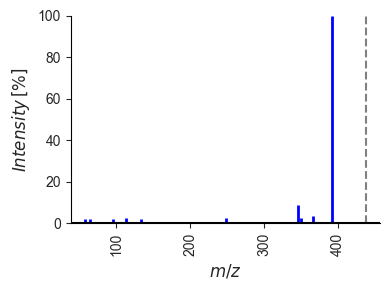

In [565]:
instance = library_bad_quality.loc[874]
ms2_plot(instance['msms'], pmz1=instance['reference_precursor_mz'],
         savepath=os.path.join(clean_noise_dir, instance['reference_name']+'_'+instance['reference_adduct']+'_'+str(instance['ce'])+'.png')
         )

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

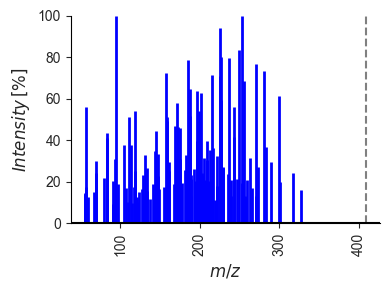

In [571]:
instance = library_high_quality.iloc[5]
ms2_plot(instance['msms_denoised'], pmz1=instance['reference_precursor_mz'],
         savepath=os.path.join(clean_noise_dir, instance['reference_name']+'_'+instance['reference_adduct']+'_'+str(instance['ce'])+'.png')
         )

In [335]:
mrm_validated[mrm_validated['es_denoised']>=0.75]

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,spectral_entropy,msms_denoised_bp,key,mrm_raw_1,mrm_raw_2,mrm_raw_3,mrm_raw_intensity_sum,es_raw,es_denoised,es_threshold
0,Hesperidin,6,6,65,610.189770,5.77,COc1ccc(C2CC(=O)c3c(O)cc(OC4OC(COC5OC(C)C(O)C(...,C28H34O15,[M+H]+,611.197046,...,2.499081,52.0949\t4721.0\n57.034\t8462.0\n58.99925\t557...,Hesperidin65[M+H]+,"(153.0188, 0.14015415076696966)","(177.05528, 0.16442911237576263)","(71.04947, 0.11185330042309674)",0.416437,0.844574,0.869127,0.844574
1,4-Hydroxy-6-Methylpyran-2-One,6,6,65,126.031694,3.61,Cc1cc(O)cc(=O)o1,C6H6O3,[M+H]+,127.038970,...,2.072710,51.03158\t4495.0\n53.03918\t12737.0\n54.38546\...,4-Hydroxy-6-Methylpyran-2-One65[M+H]+,"(99.04444, 0.3088654252952872)","(71.04951, 0.14384050405367374)","(68.99738, 0.06251645528248613)",0.515222,0.939268,0.967693,0.939268
2,Acetosyringone,6,6,65,196.073559,5.42,COc1cc(C(C)=O)cc(OC)c1O,C10H12O4,[M+H]+,197.080835,...,1.014745,52.28019\t8468.0\n75.79913\t8184.0\n81.45593\t...,Acetosyringone65[M+H]+,"(140.04735, 0.6230292099714215)","(155.07094, 0.11380007920622517)","(123.04433, 0.054240208933177776)",0.791069,0.899656,0.960955,0.899656
3,"3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin",6,6,65,274.084124,8.49,CCOc1cccc(C(=O)c2ccc(O)c(O)c2O)c1,C15H14O5,[M+H]+,275.091400,...,1.332669,51.61005\t3474.0\n71.05319\t3454.0\n79.01817\t...,"3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin...","(153.01878, 0.44832188985451576)","(121.02877, 0.2716685072261968)","(149.06033, 0.1746905459259615)",0.894681,0.958517,0.976360,0.958517
4,Piperonylic Acid,6,6,65,166.026609,5.87,O=C(O)c1ccc2c(c1)OCO2,C8H6O4,[M+H]+,167.033885,...,1.705243,62.99045\t3163.0\n65.03881\t8956.0\n66.08633\t...,Piperonylic Acid65[M+H]+,"(111.04451, 0.20975894412549667)","(93.0337, 0.06591492246565232)","(65.03881, 0.07685640484342954)",0.352530,0.543896,0.786129,0.543896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,Chrysin,2,12,65,254.057909,8.88,O=c1cc(-c2ccccc2)oc2cc(O)cc(O)c12,C15H10O4,[M-H]-,253.050633,...,2.003389,63.02417\t26117.0\n65.00336\t10904.0\n71.97463...,Chrysin65[M-H]-,"(63.02417, 0.2506670505806699)","(143.05052, 0.15029273442748825)","(65.00336, 0.10465495728956714)",0.505615,0.785393,0.842078,0.785393
4830,Gibberellic Acid,12,12,65,346.141638,5.28,C=C1CC23CC1(O)CCC2C12C=CC(O)C(C)(C(=O)O1)C2C3C...,C19H22O6,[M-H]-,345.134362,...,0.993309,50.73457\t3742.0\n66.0679\t3782.0\n69.49218\t4...,Gibberellic Acid65[M-H]-,"(143.08696, 0.36311622646530506)","(221.13438, 0.07115960348612867)","(71.05106, 0.057374758831747724)",0.491651,0.597829,0.818601,0.597829
4831,Alpha-Mangostin,7,12,35,410.172939,13.12,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,C24H26O6,[M-H]-,409.165663,...,1.441369,56.96497\t3795.0\n79.23924\t4342.0\n113.64709\...,Alpha-Mangostin35[M-H]-,"(351.08887, 0.38515702646399874)","(339.0881, 0.14736848015901982)","(377.14175, 0.12609284017721278)",0.658618,0.807073,0.901932,0.807073
4832,Isoliquiritigenin,7,12,35,256.073559,7.88,O=C(C=Cc1ccc(O)cc1)c1ccc(O)cc1O,C15H12O4,[M-H]-,255.066283,...,1.290832,54.68072\t3176.0\n67.45937\t3701.0\n77.71555\t...,Isoliquiritigenin35[M-H]-,"(119.05052, 0.3366667466046348)","(135.00919, 0.21443359952676722)","(153.01978, 0.11322413806885856)",0.664324,0.842262,0.959972,0.842262


In [340]:
mrm_validated[mrm_validated['es_denoised']>=0.75]

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,spectral_entropy,msms_denoised_bp,key,mrm_raw_1,mrm_raw_2,mrm_raw_3,mrm_raw_intensity_sum,es_raw,es_denoised,es_threshold
0,Hesperidin,6,6,65,610.189770,5.77,COc1ccc(C2CC(=O)c3c(O)cc(OC4OC(COC5OC(C)C(O)C(...,C28H34O15,[M+H]+,611.197046,...,2.499081,52.0949\t4721.0\n57.034\t8462.0\n58.99925\t557...,Hesperidin65[M+H]+,"(153.0188, 0.14015415076696966)","(177.05528, 0.16442911237576263)","(71.04947, 0.11185330042309674)",0.416437,0.844574,0.869127,0.844574
1,4-Hydroxy-6-Methylpyran-2-One,6,6,65,126.031694,3.61,Cc1cc(O)cc(=O)o1,C6H6O3,[M+H]+,127.038970,...,2.072710,51.03158\t4495.0\n53.03918\t12737.0\n54.38546\...,4-Hydroxy-6-Methylpyran-2-One65[M+H]+,"(99.04444, 0.3088654252952872)","(71.04951, 0.14384050405367374)","(68.99738, 0.06251645528248613)",0.515222,0.939268,0.967693,0.939268
2,Acetosyringone,6,6,65,196.073559,5.42,COc1cc(C(C)=O)cc(OC)c1O,C10H12O4,[M+H]+,197.080835,...,1.014745,52.28019\t8468.0\n75.79913\t8184.0\n81.45593\t...,Acetosyringone65[M+H]+,"(140.04735, 0.6230292099714215)","(155.07094, 0.11380007920622517)","(123.04433, 0.054240208933177776)",0.791069,0.899656,0.960955,0.899656
3,"3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin",6,6,65,274.084124,8.49,CCOc1cccc(C(=O)c2ccc(O)c(O)c2O)c1,C15H14O5,[M+H]+,275.091400,...,1.332669,51.61005\t3474.0\n71.05319\t3454.0\n79.01817\t...,"3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin...","(153.01878, 0.44832188985451576)","(121.02877, 0.2716685072261968)","(149.06033, 0.1746905459259615)",0.894681,0.958517,0.976360,0.958517
4,Piperonylic Acid,6,6,65,166.026609,5.87,O=C(O)c1ccc2c(c1)OCO2,C8H6O4,[M+H]+,167.033885,...,1.705243,62.99045\t3163.0\n65.03881\t8956.0\n66.08633\t...,Piperonylic Acid65[M+H]+,"(111.04451, 0.20975894412549667)","(93.0337, 0.06591492246565232)","(65.03881, 0.07685640484342954)",0.352530,0.543896,0.786129,0.543896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,Chrysin,2,12,65,254.057909,8.88,O=c1cc(-c2ccccc2)oc2cc(O)cc(O)c12,C15H10O4,[M-H]-,253.050633,...,2.003389,63.02417\t26117.0\n65.00336\t10904.0\n71.97463...,Chrysin65[M-H]-,"(63.02417, 0.2506670505806699)","(143.05052, 0.15029273442748825)","(65.00336, 0.10465495728956714)",0.505615,0.785393,0.842078,0.785393
4830,Gibberellic Acid,12,12,65,346.141638,5.28,C=C1CC23CC1(O)CCC2C12C=CC(O)C(C)(C(=O)O1)C2C3C...,C19H22O6,[M-H]-,345.134362,...,0.993309,50.73457\t3742.0\n66.0679\t3782.0\n69.49218\t4...,Gibberellic Acid65[M-H]-,"(143.08696, 0.36311622646530506)","(221.13438, 0.07115960348612867)","(71.05106, 0.057374758831747724)",0.491651,0.597829,0.818601,0.597829
4831,Alpha-Mangostin,7,12,35,410.172939,13.12,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,C24H26O6,[M-H]-,409.165663,...,1.441369,56.96497\t3795.0\n79.23924\t4342.0\n113.64709\...,Alpha-Mangostin35[M-H]-,"(351.08887, 0.38515702646399874)","(339.0881, 0.14736848015901982)","(377.14175, 0.12609284017721278)",0.658618,0.807073,0.901932,0.807073
4832,Isoliquiritigenin,7,12,35,256.073559,7.88,O=C(C=Cc1ccc(O)cc1)c1ccc(O)cc1O,C15H12O4,[M-H]-,255.066283,...,1.290832,54.68072\t3176.0\n67.45937\t3701.0\n77.71555\t...,Isoliquiritigenin35[M-H]-,"(119.05052, 0.3366667466046348)","(135.00919, 0.21443359952676722)","(153.01978, 0.11322413806885856)",0.664324,0.842262,0.959972,0.842262


In [339]:
3898/4834

0.806371534960695

In [342]:
(4315)/4834

0.8926354985519239

In [317]:
len(mrm_validated[mrm_validated['es_denoised']>=0.7])

5050

In [106]:
(4819-4121)/4121

0.16937636495996117

In [137]:
mrm_dilutions_valid_matched = mrm_dilutions_valid[mrm_dilutions_valid['es_denoised']>=0.75]

In [138]:
mrm_dilutions_valid_matched[mrm_dilutions_valid_matched['es_raw']<=0.75]

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,ei,normalized_entropy,key,mrm_raw_1,mrm_raw_2,mrm_raw_3,mrm_raw_intensity_sum,es_raw,es_denoised,diff
1198,SPERMIDINE,12,9,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,11.64501,0.220961,SPERMIDINE65[M+H]+,"(72.0811, 0.07572669185456751)","(84.08104, 0.01650927963499953)","(112.11276, 0.009506565138212257)",0.101743,0.262189,0.975322,0.713133
3408,Acetosyringone,6,5,35,196.073559,5.44,COc1cc(C(C)=O)cc(OC)c1O,C10H12O4,[M-H]-,195.066283,...,11.90327,0.048393,Acetosyringone35[M-H]-,"(180.04352, 0.07322028375794805)","(165.01923, 0.029727023129003972)","(137.02461, 0)",0.102947,0.238903,0.879681,0.640778
465,"ORSELLINIC ACID, ETHYL ESTER",9,6,65,196.073559,8.41,CCOC(=O)c1c(C)cc(O)cc1O,C10H12O4,[M-H]-,195.066283,...,18.61429,0.071599,"ORSELLINIC ACID, ETHYL ESTER65[M-H]-","(105.03471, 0.18614294552632354)","(149.02475, 0)","(65.00339, 0)",0.186143,0.349694,0.911839,0.562145
5884,TRIDESACETOXYKHIVORIN,9,7,35,460.246103,6.93,CC1(C)C(O)CC(O)C2(C)C1CC(O)C1(C)C2CCC2(C)C(c3c...,C26H36O7,[M+H]+,461.253379,...,17.73940,0.963351,TRIDESACETOXYKHIVORIN35[M+H]+,"(359.18713, 0.17739400073214323)","(341.17346, 0)","(323.16354, 0)",0.177394,0.334996,0.896223,0.561226
5631,Corynanthine,6,3,35,354.194343,5.72,COC(=O)C1C(O)CCC2CN3CCc4c([nH]c5ccccc45)C3CC21,C21H26N2O3,[M-H]-,353.187067,...,22.03843,0.930723,Corynanthine35[M-H]-,"(177.01897, 0.22038433471174895)","(176.01225, 0)","(321.16269, 0)",0.220384,0.390306,0.912901,0.522595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,Ginkgolide A,6,5,35,408.142032,6.65,CC1C(=O)OC2CC34C5CC(C(C)(C)C)C36C(OC(=O)C6O)OC...,C20H24O9,[M+H]+,409.149308,...,92.98141,0.847090,Ginkgolide A35[M+H]+,"(345.13425, 0)","(249.07552, 0.054626925674225946)","(299.12753, 0.055263829508522544)",0.109891,0.726672,0.751506,0.024834
3751,3-Deoxo-3Beta-Hydroxymexicanolide 16-Enol Ether,3,4,65,484.246103,10.67,COC(=O)CC1C(C)(C)C(O)C2CC3=C4C=C(OC)OC(c5ccoc5...,C28H36O7,[M+H]+,485.253379,...,93.50764,0.776491,3-Deoxo-3Beta-Hydroxymexicanolide 16-Enol Ethe...,"(95.04949, 0.07419168382645136)","(67.0546, 0.057738159748564)","(105.07051, 0.06788049564683357)",0.199810,0.737270,0.760101,0.022831
2925,MORIN,9,5,45,302.042653,5.03,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,C15H10O7,[M+H]+,303.049929,...,94.51420,0.829493,MORIN45[M+H]+,"(229.05138, 0.19735877609893357)","(153.01872, 0.20350665626256179)","(137.02385, 0.11327469201484949)",0.514140,0.732982,0.752635,0.019652
4055,Picrotoxinin,6,4,35,292.094688,6.39,C=C(C)C1C2OC(=O)C1C1(O)CC3OC34C(=O)OC2C14C,C15H16O6,[M+H]+,293.101964,...,95.36777,0.861135,Picrotoxinin35[M+H]+,"(157.10179, 0.07612937466829009)","(173.0968, 0.06150682151665574)","(185.09642, 0.04582669913521276)",0.183463,0.749358,0.765468,0.016110


In [121]:
import time

In [275]:
mrm_dilutions_valid.to_csv(os.path.join(master_dir, 'mrm_dilutions_valid.csv'), index = False)

In [3]:
mrm_dilutions_valid= pd.read_csv(os.path.join(master_dir, 'mrm_dilutions_valid.csv'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/mrm_dilutions_valid.csv'

In [30]:
mrm_dilutions_valid_matched = mrm_dilutions_valid[mrm_dilutions_valid['es_denoised']>=0.75]

In [4]:
mrm_dilutions_valid_matched=pd.read_csv(os.path.join(master_dir, 'mrm_dilutions_validated.csv'))

In [5]:
mrm_dilutions_valid_matched

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,msms_denoised,ei,normalized_entropy,spectral_entropy,msms_denoised_bp,key,mrm_raw_1,mrm_raw_2,mrm_raw_3,mrm_raw_intensity_sum
0,Hesperidin,6,6,65,610.189770,5.77,COc1ccc(C2CC(=O)c3c(O)cc(OC4OC(COC5OC(C)C(O)C(...,C28H34O15,[M+H]+,611.197046,...,52.0949\t4721.0\n57.034\t8462.0\n58.99925\t557...,94.39671,0.541941,2.499081,52.0949\t4721.0\n57.034\t8462.0\n58.99925\t557...,Hesperidin65[M+H]+,"(153.0188, 0.14015415076696966)","(177.05528, 0.16442911237576263)","(71.04947, 0.11185330042309674)",0.416437
1,4-Hydroxy-6-Methylpyran-2-One,6,6,65,126.031694,3.61,Cc1cc(O)cc(=O)o1,C6H6O3,[M+H]+,127.038970,...,53.03918\t12737.0\n57.034\t5646.0\n65.03899\t1...,91.60141,0.419060,2.072710,51.03158\t4495.0\n53.03918\t12737.0\n54.38546\...,4-Hydroxy-6-Methylpyran-2-One65[M+H]+,"(99.04444, 0.3088654252952872)","(71.04951, 0.14384050405367374)","(68.99738, 0.06251645528248613)",0.515222
2,Acetosyringone,6,6,65,196.073559,5.42,COc1cc(C(C)=O)cc(OC)c1O,C10H12O4,[M+H]+,197.080835,...,82.99239\t8992.0\n95.04967\t14082.0\n123.04433...,87.76237,0.136925,1.014745,52.28019\t8468.0\n75.79913\t8184.0\n81.45593\t...,Acetosyringone65[M+H]+,"(140.04735, 0.6230292099714215)","(155.07094, 0.11380007920622517)","(123.04433, 0.054240208933177776)",0.791069
3,"3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin",6,6,65,274.084124,8.49,CCOc1cccc(C(=O)c2ccc(O)c(O)c2O)c1,C15H14O5,[M+H]+,275.091400,...,71.05319\t3454.0\n79.01817\t7126.0\n107.01289\...,96.39276,0.103764,1.332669,51.61005\t3474.0\n71.05319\t3454.0\n79.01817\t...,"3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin...","(153.01878, 0.44832188985451576)","(121.02877, 0.2716685072261968)","(149.06033, 0.1746905459259615)",0.894681
4,Piperonylic Acid,6,6,65,166.026609,5.87,O=C(O)c1ccc2c(c1)OCO2,C8H6O4,[M+H]+,167.033885,...,65.03881\t8956.0\n79.02135\t6056.0\n93.0337\t7...,51.23703,0.536799,1.705243,62.99045\t3163.0\n65.03881\t8956.0\n66.08633\t...,Piperonylic Acid65[M+H]+,"(111.04451, 0.20975894412549667)","(93.0337, 0.06591492246565232)","(65.03881, 0.07685640484342954)",0.352530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,Isoliquiritigenin,7,12,35,256.073559,7.88,O=C(C=Cc1ccc(O)cc1)c1ccc(O)cc1O,C15H12O4,[M-H]-,255.066283,...,78.04071\t2979.0\n91.01958\t5802.0\n119.05052\...,77.67793,0.391916,1.290832,54.68072\t3176.0\n67.45937\t3701.0\n77.71555\t...,Isoliquiritigenin35[M-H]-,"(119.05052, 0.3366667466046348)","(135.00919, 0.21443359952676722)","(153.01978, 0.11322413806885856)",0.664324
6392,Mangiferin,7,12,35,422.084911,4.29,O=c1c2cc(O)c(O)cc2oc2cc(O)c(C3OC(CO)C(O)C(O)C3...,C19H18O11,[M-H]-,421.077635,...,120.01727\t5487.0\n259.02612\t6400.0\n301.0369...,49.65613,0.705975,0.897249,53.55787\t3717.0\n63.44184\t4062.0\n74.18548\t...,Mangiferin35[M-H]-,"(301.03696, 0.3196081934024056)","(331.04709, 0)","(259.02612, 0.09527212099559366)",0.414880
6393,ONONETIN,9,12,45,258.089209,8.83,COc1ccc(CC(=O)c2ccc(O)cc2O)cc1,C15H14O4,[M-H]-,257.081933,...,54.96645\t3520.0\n79.02731\t4140.0\n107.01408\...,64.08128,0.772316,2.043375,54.96645\t3520.0\n79.02731\t4140.0\n84.5222\t7...,ONONETIN45[M-H]-,"(136.01688, 0.1694245218579235)","(135.00929, 0.11409665300546448)","(107.01408, 0.07283128415300547)",0.356352
6394,"2',4'-Dihydroxy-4-Methoxychalcone",9,12,45,270.089209,9.68,COc1ccc(C=CC(=O)c2ccc(O)cc2O)cc1,C16H14O4,[M-H]-,269.081933,...,80.01942\t3760.0\n114.99314\t3287.0\n269.04688...,7.14235,0.135808,0.690893,59.22914\t3784.0\n59.79765\t3068.0\n62.96413\t...,"2',4'-Dihydroxy-4-Methoxychalcone45[M-H]-","(148.01688, 0)","(180.00534, 0.056152211705621013)","(135.009, 0)",0.056152


In [207]:
instance = mrm_dilutions_valid_matched.iloc[4]

In [29]:
for conc in range(2, 14):
    dilutions_conc = string_search(mrm_dilutions_valid, 'conc', conc)
    fig = plt.figure(figsize = (12, 8))#43
    ax = fig.add_subplot()
    #
    # for conc in mrm_dilutions['conc'].unique():
    #     matche_temp = string_search(mrm_dilutions, 'conc', conc)

    sns.distplot(dilutions_conc['es_raw'], label= 'similarity_raw_'+str(conc), hist=False)
    sns.distplot(dilutions_conc['es_denoised'], label= 'similarity_denoised_'+str(conc), hist=False)
    # sns.lineplot(x = range(1,14), y = ns_means)
    # sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
    plt.vlines(x = 0.75, ymin=0, ymax=1.8, color = 'red')
    plt.grid(False)
    plt.legend()

    plt.savefig(os.path.join(figs_dir, 'similarity_raw_denoised_'+str(conc)+'.png'))
    plt.close()

In [30]:
dilutions_conc

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,ei,normalized_entropy,key,mrm_raw_1,mrm_raw_2,mrm_raw_3,raw_sum_temp,mrm_raw_intensity_sum,es_raw,es_denoised
0,Alpha-Mangostin,7,13,45,410.172939,13.14,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,C24H26O6,[M+H]+,411.180215,...,40.41115,0.928054,Alpha-Mangostin45[M+H]+,"(299.05426, 0.17624845597317804)","(337.10831, 0)","(284.03262, 0)",0.176248,0.176248,0.188766,0.279354
1,4'-HYDROXYCHALCONE,9,13,35,224.083730,8.89,O=C(C=Cc1ccccc1)c1ccc(O)cc1,C15H12O2,[M+H]+,225.091006,...,66.58414,0.589880,4'-HYDROXYCHALCONE35[M+H]+,"(131.04956, 0.1302308446321551)","(121.02912, 0.05389883360634708)","(103.05455, 0)",0.184130,0.184130,0.302165,0.398217
2,ONONETIN,9,13,35,258.089209,8.81,COc1ccc(CC(=O)c2ccc(O)cc2O)cc1,C15H14O4,[M+H]+,259.096485,...,70.53166,0.583690,ONONETIN35[M+H]+,"(213.09198, 0.29314682419629634)","(123.04449, 0.108585577122112)","(121.06523, 0.07049026320398707)",0.472223,0.472223,0.713854,0.872640
3,ARTEMISIN,9,13,35,262.120509,5.63,CC1=C2C3OC(=O)C(C)C3C(O)CC2(C)C=CC1=O,C15H18O4,[M+H]+,263.127785,...,24.34621,0.871664,ARTEMISIN35[M+H]+,"(189.12831, 0.24346208270006814)","(199.11246, 0)","(201.12813, 0)",0.243462,0.243462,0.211743,0.408365
4,"2',4'-Dihydroxy-4-Methoxychalcone",9,13,35,270.089209,9.65,COc1ccc(C=CC(=O)c2ccc(O)cc2O)cc1,C16H14O4,[M+H]+,271.096485,...,57.76044,0.480366,"2',4'-Dihydroxy-4-Methoxychalcone35[M+H]+","(137.0237, 0.43130076101554005)","(161.06064, 0.14630363880539746)","(253.0872, 0)",0.577604,0.577604,0.502797,0.735930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,"2',4'-Dihydroxy-4-Methoxychalcone",9,13,45,270.089209,9.68,COc1ccc(C=CC(=O)c2ccc(O)cc2O)cc1,C16H14O4,[M-H]-,269.081933,...,11.46806,0.240115,"2',4'-Dihydroxy-4-Methoxychalcone45[M-H]-","(148.01688, 0)","(180.00662, 0.04066293749891762)","(135.009, 0)",0.040663,0.040663,0.085526,0.215048
174,"2',4'-Dihydroxychalcone",7,13,35,240.078644,9.81,O=C(C=Cc1ccccc1)c1ccc(O)cc1O,C15H12O3,[M-H]-,239.071368,...,27.74026,0.921742,"2',4'-Dihydroxychalcone35[M-H]-","(135.00922, 0.1478154266650589)","(197.06178, 0.12958720205796054)","(148.017, 0)",0.277403,0.277403,0.334157,0.642348
175,Alpha-Mangostin,7,13,35,410.172939,13.12,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,C24H26O6,[M-H]-,409.165663,...,88.86695,0.425811,Alpha-Mangostin35[M-H]-,"(351.08905, 0.39520912256533886)","(339.08762, 0.16703019171162897)","(377.14078, 0.11905253893544561)",0.681292,0.681292,0.702142,0.754015
176,Isoliquiritigenin,7,13,35,256.073559,7.88,O=C(C=Cc1ccc(O)cc1)c1ccc(O)cc1O,C15H12O4,[M-H]-,255.066283,...,68.34818,0.449268,Isoliquiritigenin35[M-H]-,"(119.05041, 0.3645934148412965)","(135.00874, 0.19794979162140275)","(153.01984, 0.08453653044697702)",0.647080,0.647080,0.676245,0.870649


In [3]:
n_saved = []
saved = pd.DataFrame()
for conc in range(2, 14):
    dilutions_conc = string_search(mrm_dilutions_valid, 'conc', conc)
    matched = dilutions_conc[dilutions_conc['es_denoised']>=0.75]
    not_matched = matched[matched['es_raw']<0.75]
    n_saved.append(len(not_matched))
    saved = pd.concat([saved, not_matched], ignore_index=True)
    # break

In [8]:
len(saved)

711

In [10]:
from toolsets.helpers import save_value_counts
vc = save_value_counts(saved, 'conc')

In [14]:
vc

,unique_values,counts
0,8,104
1,7,88
2,9,86
3,6,67
4,10,67
5,11,60
6,5,53
7,4,49
8,3,39
9,2,37


([<matplotlib.patches.Wedge at 0x16047ae50>,
 [Text(0.9858872959581438, 0.48787932900292, '0.1'),
  Text(0.2858745005412432, 1.06220326206442, '0.05'),
  Text(-0.5330779820013772, 0.9621994934031818, '0.02'),
  Text(-1.01788737010013, 0.41701954605346825, '0.005'),
  Text(-1.0773565215974779, -0.2220426206190679, '0.002'),
  Text(-0.7939698985268662, -0.7613224022930352, '0.001'),
  Text(-0.33251422747058235, -1.0485391211250261, '0.0005'),
  Text(0.15742098215035977, -1.088677470318375, '0.0002'),
  Text(0.5583968996262382, -0.9477303954647677, '0.0001'),
  Text(0.8395164676787975, -0.7107827378996445, '5e-05'),
  Text(1.021532844857105, -0.40800814560269516, '2e-05'),
  Text(1.0932955767042112, -0.1212632753928685, '1e-05')])

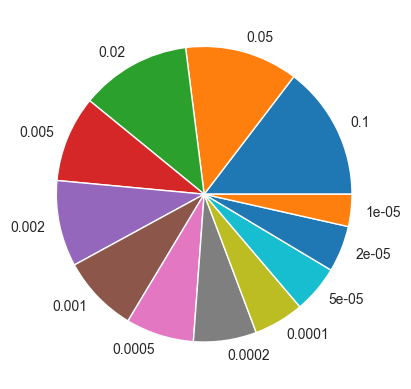

In [17]:
plt.pie(vc['counts'], labels = [0.1,0.05, 0.02, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001, 0.00005, 0.00002, 0.00001])

In [36]:
mrm_dilutions_valid.sort_values(by = 'reference_name', ascending=True, inplace=True)

In [38]:
mrm_dilutions_valid.sort_values(by = 'diff', ascending=False, inplace=True)

In [45]:
library_high_quailty['key']=library_high_quailty['reference_name']+library_high_quailty['ce'].astype(str)+library_high_quailty['reference_adduct']

In [49]:
np.sum(n_saved)

3669

In [50]:
len(mrm_dilutions_valid[mrm_dilutions_valid['es_raw']>0.75])

3669

In [51]:
len(mrm_dilutions_valid[mrm_dilutions_valid['es_denoisedb']>0.75])

4380

In [213]:
mrm_dilutions_valid_matched['key']

1080                                   SPERMIDINE65[M+H]+
4534                                    Enoxolone35[M-H]-
713                                    SPERMIDINE65[M+H]+
6318    3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin...
5861                             Piperonylic Acid35[M-H]-
                              ...                        
2279                                      Gitoxin45[M-H]-
5372                                   Gitoxin45[M+FA-H]-
399                                      Tomatine35[M+H]+
4049                                      Gitoxin35[M-H]-
1813                                     Tomatine35[M+H]+
Name: key, Length: 4380, dtype: object

In [24]:
library_high_quailty['key']=library_high_quailty['reference_name']+library_high_quailty['ce'].astype(str)+library_high_quailty['reference_adduct']

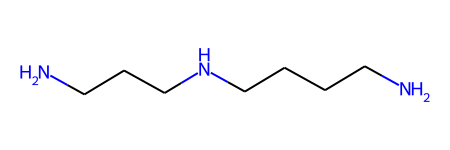

In [219]:
Chem.MolFromSmiles(instance['reference_smiles'])

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

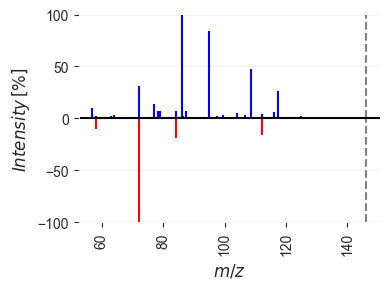

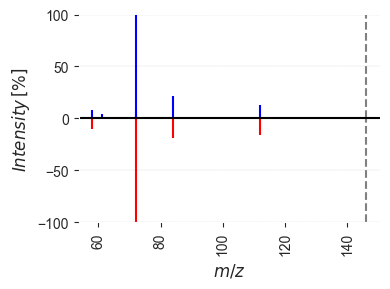

In [32]:
instance = mrm_dilutions_valid_matched.iloc[0]
identity = string_search(library_high_quailty, 'key', instance['key'])
head_to_tail_plot(instance['msms'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  # savepath= os.path.join(figs_dir, 'demo_fig_raw_'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_raw'])+'.png')
                  )
head_to_tail_plot(instance['msms_denoised'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  # savepath= os.path.join(figs_dir, 'demo_fig_denoised_'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_denoised'])+'.png')
                  )


In [48]:
mass = []
for i in [1,2,3]:
    mass_temp, int_temp = so.get_top_n(instance['msms'], i, pmz=instance['reference_precursor_mz'])
    mass.append(mass_temp)

In [422]:
ei_w = []
msms_dw = []
for index, row in tqdm(library_high_quailty.iterrows(), total = len(library_high_quailty)):
    r = de.denoise_w(row['msms'], row['reference_smiles'], row['reference_adduct'], reference_db_sorted)
    ei_w.append(r[1])
    msms_dw.append(r[0])

100%|██████████| 844/844 [01:24<00:00, 10.04it/s]


In [423]:
library_high_quailty['ei_w']=ei_w
library_high_quailty['msms_dw']=msms_dw

In [425]:
library_high_quailty['ei_w'].describe()

count    844.000000
mean      96.504390
std        3.995483
min       51.194620
25%       95.678620
50%       97.590200
75%       98.585592
max      100.000000
Name: ei_w, dtype: float64

In [426]:
library_high_quailty['ei'].describe()

count    844.000000
mean      97.182081
std        2.209773
min       90.092360
25%       96.336345
50%       97.861710
75%       98.767045
max      100.000000
Name: ei, dtype: float64

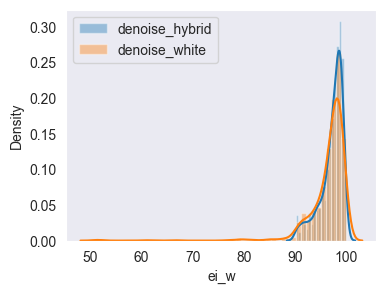

In [424]:
fig = plt.figure(figsize = (4, 3))#43
ax = fig.add_subplot()
#
sns.distplot(library_high_quailty['ei'], label = 'denoise_hybrid')
sns.distplot(library_high_quailty['ei_w'], label = 'denoise_white')
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=1.8, color = 'red')
plt.grid(False)
plt.legend()

In [49]:
mass

[86.00389, 95.00922, 108.49388]

In [38]:
from toolsets.mass_to_formula import mass_to_formula

In [85]:
all_formula = mass_to_formula(mass[0]+mass_e, 0.005*2)
allowed_formulas_0, allowed_masses = de.get_all_allowed_formula_mass(all_formula)

In [87]:
all_formula = mass_to_formula(mass[1]+mass_e, 0.01)
allowed_formulas_1, allowed_masses = de.get_all_allowed_formula_mass(all_formula)

In [74]:
from toolsets.mass_to_formula import MolecularFormula
def check_inclusion(subformula, formula):
    sub_mol = MolecularFormula()
    sub_mol.from_string(subformula)
    mol = MolecularFormula()
    mol.from_string(formula)
    for i in range(len(sub_mol.get_data())):
        if sub_mol.get_data()[i]>mol.get_data()[i]:
            return(False)
    return(True)

In [88]:
allowed_pair = []
for i in range(len(allowed_formulas_0)):
    for j in range(len(allowed_formulas_1)):
        if check_inclusion(allowed_formulas_0[i], allowed_formulas_1[j])==True:
            allowed_pair.append([allowed_formulas_0[i], allowed_formulas_1[j]])

In [109]:
library_high_quailty.columns

Index(['reference_name', 'reference_mix', 'conc', 'ce', 'reference_mono_mass',
       'reference_rt', 'reference_smiles', 'reference_formula',
       'reference_adduct', 'reference_precursor_mz', 'RT (min)',
       'Precursor m/z', 'Height', 'ms1', 'msms', 'recovery_percent(%)',
       'msms_denoised', 'ei', 'normalized_entropy', 'spectral_entropy', 'key'],
      dtype='object')

In [110]:
library_high_quailty.insert(8, 'mode', library_high_quailty['reference_adduct'].astype(str).str[-1])

In [120]:
check_inclusion('Br', 'H2O')

False

In [126]:
library_high_quailty['reference_adduct'].value_counts()

[M+H]+       424
[M-H]-       268
[M+NH4]+      58
[M+Cl]-       42
[M+FA-H]-     30
[M+Na]+       22
Name: reference_adduct, dtype: int64

In [356]:
ei_all = []
msms_transpose = []
smiles_transpose = []
adduct_transpose = []
result_df = pd.DataFrame()
ce_transpose = []
height_transpose = []
rt_transpose = []
name_transpose = []
for index, row in tqdm(library_high_quailty.iterrows(), total = len(library_high_quailty)):
    # if row['reference_adduct']=='[M+Na]+':
    #     break
    tag = 1
    formula_temp = de.prep_formula(row['reference_smiles'],row['reference_adduct'])
    # for element in ['Br', 'F', 'P', 'S', 'Cl', 'I']:
    #     if check_inclusion(element, formula_temp)==True:
    #         # print('true')
    #         tag = tag+1
    #         break
    #         # break
    #         # break
    # # break
    if tag>0:
        search_against = quick_search_values(library_high_quailty, 'reference_rt', row['reference_rt']-10/60, row['reference_rt']+10/60, ifsorted=False)
        search_against = string_search(search_against, 'reference_formula', row['reference_formula'],reverse=True)
        search_against = string_search(search_against, 'mode', row['mode'])
        search_against = quick_search_values(search_against, 'reference_precursor_mz', value_start=row['reference_precursor_mz']-1,
                                             value_end=row['reference_precursor_mz']+1,ifsorted=False)
        ei_row = []
        # break
        if len(search_against)>1:
            for i, r in search_against.iterrows():
                result = de.denoise_h(r['msms'], row['reference_smiles'], row['reference_adduct'], reference_db_sorted)
                ei_all.append(result[1])
                msms_transpose.append(r['msms_denoised'])
                ce_transpose.append(r['ce'])
                rt_transpose.append(r['RT (min)'])
                result_df = pd.concat([result_df, pd.DataFrame([row])],ignore_index = True)
                smiles_transpose.append(r['reference_smiles'])
                adduct_transpose.append(r['reference_adduct'])
                height_transpose.append(r['Height'])
                name_transpose.append(r['reference_name'])
result_df = result_df[['reference_name','reference_smiles', 'reference_adduct', 'reference_precursor_mz', 'RT (min)', 'ce','Height',  'msms_denoised']]
result_df['name_transpose']=name_transpose
result_df['ei_transpose']=ei_all
result_df['msms_transpose']=msms_transpose
result_df['smiles_transpose']=smiles_transpose
result_df['adduct_transpose']=adduct_transpose
result_df['height_transpose']=height_transpose
result_df['ce_transpose']=ce_transpose
result_df.sort_values(by = 'ei_transpose', ascending=True, inplace=True)
    # break
    # break

100%|██████████| 844/844 [00:07<00:00, 114.76it/s]


In [357]:
result_df.sort_values(by = 'ei_transpose', ascending=True, inplace=True)

In [416]:
msms_mix = []
es_1_mixture = []
es_d1_mixture = []
es_2_mixture = []
es_d2_mixture = []
msms_denoised_1 = []
msms_denoised_2 = []
for index, row in tqdm(result_df.iterrows(), total = len(result_df)):
    msms_mixture = so.add_spectra(row['msms_denoised'], row['msms_transpose'])
    msms_mixture = so.normalize_spectrum(msms_mixture)
    msms1 = row['msms_denoised']
    msms2 = row['msms_transpose']
    # msms_mixture = so.add_spectra(so.truncate_msms(row['msms_denoised'],row['reference_precursor_mz']-1.6 ), so.truncate_msms(row['msms_transpose'],calculate_precursormz(row['smiles_transpose'], row['adduct_transpose'])-1.6) )
    # msms1=row['msms_denoised']
    # msms2 = row['msms_transpose']
    # msms1 = so.normalize_spectrum(so.truncate_msms(row['msms_denoised'],row['reference_precursor_mz']-1.6 ))
    # msms2 = so.normalize_spectrum(so.truncate_msms(row['msms_transpose'],calculate_precursormz(row['smiles_transpose'], row['adduct_transpose'])-1.6 ))
    # data_subset = pd.DataFrame(zip([msms1, msms2], [row['Height'], row['height_transpose']]), columns=['peaks', 'ms1_precursor_intensity'])
    # msms_mixture = so.weighted_average_spectra(data_subset)
    msms_mix.append(msms_mixture)
    msms_mix_denoise1 = de.denoise_h(msms_mixture, row['reference_smiles'], row['reference_adduct'], reference_db_sorted)
    msms_mix_denoise2 = de.denoise_h(msms_mixture, row['smiles_transpose'], row['adduct_transpose'], reference_db_sorted)
    msms_denoised_1.append(msms_mix_denoise1[0])
    msms_denoised_2.append(msms_mix_denoise2[0])
    es_1_mixture.append(flash_entropy_simple(msms1, msms_mixture, pmz=row['reference_precursor_mz']))
    es_d1_mixture.append(flash_entropy_simple(msms_mix_denoise1[0], msms1, pmz=row['reference_precursor_mz']))
    es_2_mixture.append(flash_entropy_simple(msms2, msms_mixture, pmz=calculate_precursormz(row['smiles_transpose'], row['adduct_transpose'])))
    es_d2_mixture.append(flash_entropy_simple(msms_mix_denoise2[0], msms2, pmz=calculate_precursormz(row['smiles_transpose'], row['adduct_transpose'])))

    # msms_mix.append(so.weighted_average_spectra())
    # break
result_df['msms_mix']=msms_mix
result_df['msms_denoised_1']=msms_denoised_1
result_df['msms_denoised_2']=msms_denoised_2
result_df['es_1_mixture'] = es_1_mixture
result_df['es_d1_mixture']=es_d1_mixture
result_df['es_2_mixture'] = es_2_mixture
result_df['es_d2_mixture']=es_d2_mixture
result_df['diff1']=abs(result_df['es_d1_mixture']-result_df['es_1_mixture'])
result_df['diff2']=abs(result_df['es_d2_mixture']-result_df['es_2_mixture'])

100%|██████████| 72/72 [00:58<00:00,  1.23it/s]


In [417]:
result_df

,reference_name,reference_smiles,reference_adduct,reference_precursor_mz,RT (min),ce,Height,msms_denoised,name_transpose,ei_transpose,...,ce_transpose,msms_mix,es_1_mixture,es_d1_mixture,es_2_mixture,es_d2_mixture,diff1,diff2,msms_denoised_1,msms_denoised_2
42,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.006239,35,9479071.0,59.00926\t6884.0\n201.01895\t18482.0\n219.0274...,MORIN,41.29559,...,35,59.00926\t0.0012243\n81.03416\t0.00353188\n121...,0.724029,0.826259,0.677843,0.822478,1.022295e-01,1.446341e-01,59.00926\t0.0012243\n81.03416\t0.00353188\n121...,59.00926\t0.0012243\n81.03416\t0.00353188\n121...
39,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.007296,45,21153388.0,201.01941\t41080.0\n217.01373\t28618.0\n219.03...,MORIN,41.29559,...,35,81.03416\t0.00281153\n121.02915\t0.00380708\n1...,0.847309,0.900690,0.378858,0.489603,5.338049e-02,1.107451e-01,81.03416\t0.00281153\n121.02915\t0.00380708\n1...,81.03416\t0.00281153\n121.02915\t0.00380708\n1...
12,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.043812,65,17859178.0,53.03905\t14468.0\n65.03898\t29000.0\n79.05447...,MORIN,41.29559,...,35,53.03905\t0.00139268\n65.03898\t0.00279152\n79...,0.967411,0.974670,0.180208,0.180208,7.259488e-03,1.490116e-08,53.03905\t0.00139268\n65.03898\t0.00279152\n79...,53.03905\t0.00139268\n65.03898\t0.00279152\n79...
37,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.007296,45,21153388.0,201.01941\t41080.0\n217.01373\t28618.0\n219.03...,MORIN,50.75869,...,45,65.03861\t0.00383812\n68.99729\t0.00809806\n81...,0.640931,0.720637,0.770867,0.884707,7.970637e-02,1.138399e-01,65.03861\t0.00383812\n68.99729\t0.00809806\n81...,65.03861\t0.00383812\n68.99729\t0.00809806\n81...
40,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.006239,35,9479071.0,59.00926\t6884.0\n201.01895\t18482.0\n219.0274...,MORIN,50.75869,...,45,59.00926\t0.00162919\n65.03861\t0.00514671\n68...,0.346849,0.549380,0.856558,0.947714,2.025310e-01,9.115595e-02,59.00926\t0.00162919\n65.03861\t0.00514671\n68...,59.00926\t0.00162919\n65.03861\t0.00514671\n68...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,"Cholic Acid, Methyl Ester",COC(=O)CCC(C)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O...,[M+NH4]+,440.337047,10.468980,35,130925136.0,55.05471\t276174.0\n67.05441\t133598.0\n73.065...,Deacetylgedunin,98.58312,...,65,53.00259\t0.00229124\n53.03909\t0.00381316\n55...,0.839460,0.821806,0.773166,0.821108,1.765460e-02,4.794276e-02,53.00259\t0.00229124\n53.03909\t0.00381316\n55...,53.00259\t0.00229124\n53.03909\t0.00381316\n55...
46,"Cholic Acid, Methyl Ester",COC(=O)CCC(C)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O...,[M+NH4]+,440.337047,10.491150,45,142146064.0,55.05487\t836552.0\n64.26657\t120986.0\n67.054...,Deacetylgedunin,98.58312,...,65,53.00259\t0.00251978\n53.03909\t0.00419351\n55...,0.846266,0.841466,0.836568,0.837127,4.799783e-03,5.593300e-04,53.00259\t0.00251978\n53.03909\t0.00419351\n55...,53.00259\t0.00251978\n53.03909\t0.00419351\n55...
58,Deacetylgedunin,CC1(C)C(=O)C=CC2(C)C1CC(O)C1(C)C2CCC2(C)C(c3cc...,[M+H]+,441.227165,10.678090,35,655957056.0,67.05464\t1027539.0\n69.03377\t479350.0\n79.05...,"Cholic Acid, Methyl Ester",98.64481,...,65,53.03876\t0.00045419\n55.05477\t0.00416655\n67...,0.970567,0.970567,0.566401,0.562702,1.192093e-07,3.699183e-03,53.03876\t0.00045419\n55.05477\t0.00416655\n67...,53.03876\t0.00045419\n55.05477\t0.00416655\n67...
1,Deacetylgedunin,CC1(C)C(=O)C=CC2(C)C1CC(O)C1(C)C2CCC2(C)C(c3cc...,[M+H]+,441.227165,10.522830,65,335575648.0,53.00259\t240879.0\n53.03909\t400879.0\n55.054...,"Cholic Acid, Methyl Ester",98.64481,...,65,53.00259\t0.00284535\n53.03876\t0.00083588\n53...,0.878492,0.878492,0.812005,0.807342,0.000000e+00,4.663408e-03,53.00259\t0.00284535\n53.03876\t0.00083588\n53...,53.00259\t0.00284535\n53.03876\t0.00083588\n53...


In [366]:
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/figs/biological_noise'

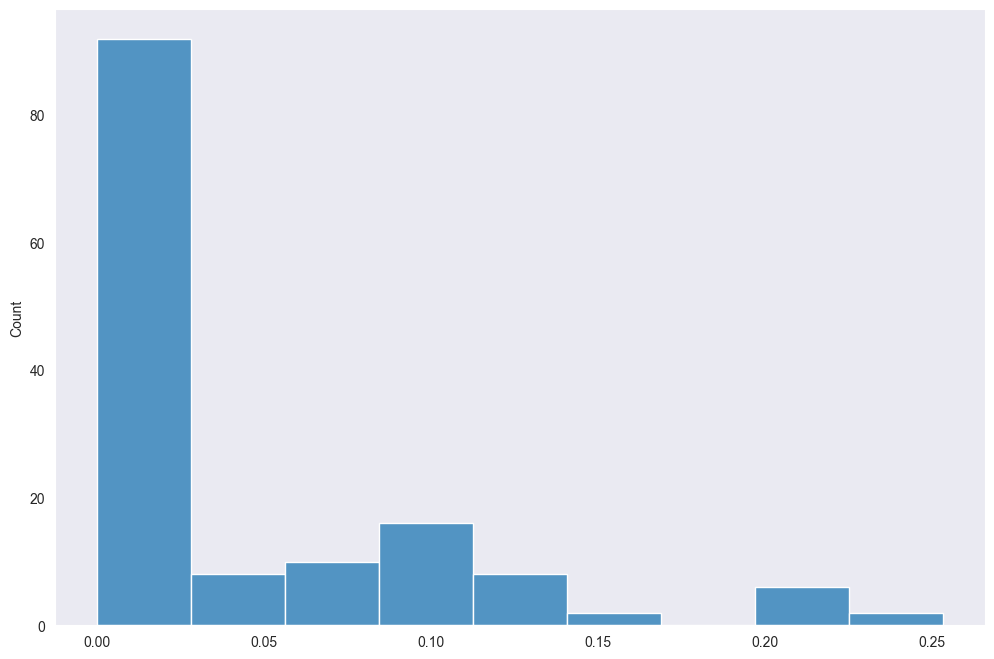

In [375]:
fig = plt.figure(figsize = (12, 8))#43
ax = fig.add_subplot()
#
sns.histplot(diff_all)
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=1.8, color = 'red')
plt.grid(False)
plt.savefig(os.path.join(fig_dir, 'entropy_enhancement_distribution.png'))
# plt.legend()


In [376]:
from toolsets.spectra_plotter import head_to_tail_plot

In [418]:
result_df

,reference_name,reference_smiles,reference_adduct,reference_precursor_mz,RT (min),ce,Height,msms_denoised,name_transpose,ei_transpose,...,ce_transpose,msms_mix,es_1_mixture,es_d1_mixture,es_2_mixture,es_d2_mixture,diff1,diff2,msms_denoised_1,msms_denoised_2
42,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.006239,35,9479071.0,59.00926\t6884.0\n201.01895\t18482.0\n219.0274...,MORIN,41.29559,...,35,59.00926\t0.0012243\n81.03416\t0.00353188\n121...,0.724029,0.826259,0.677843,0.822478,1.022295e-01,1.446341e-01,59.00926\t0.0012243\n81.03416\t0.00353188\n121...,59.00926\t0.0012243\n81.03416\t0.00353188\n121...
39,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.007296,45,21153388.0,201.01941\t41080.0\n217.01373\t28618.0\n219.03...,MORIN,41.29559,...,35,81.03416\t0.00281153\n121.02915\t0.00380708\n1...,0.847309,0.900690,0.378858,0.489603,5.338049e-02,1.107451e-01,81.03416\t0.00281153\n121.02915\t0.00380708\n1...,81.03416\t0.00281153\n121.02915\t0.00380708\n1...
12,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.043812,65,17859178.0,53.03905\t14468.0\n65.03898\t29000.0\n79.05447...,MORIN,41.29559,...,35,53.03905\t0.00139268\n65.03898\t0.00279152\n79...,0.967411,0.974670,0.180208,0.180208,7.259488e-03,1.490116e-08,53.03905\t0.00139268\n65.03898\t0.00279152\n79...,53.03905\t0.00139268\n65.03898\t0.00279152\n79...
37,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.007296,45,21153388.0,201.01941\t41080.0\n217.01373\t28618.0\n219.03...,MORIN,50.75869,...,45,65.03861\t0.00383812\n68.99729\t0.00809806\n81...,0.640931,0.720637,0.770867,0.884707,7.970637e-02,1.138399e-01,65.03861\t0.00383812\n68.99729\t0.00809806\n81...,65.03861\t0.00383812\n68.99729\t0.00809806\n81...
40,Ellagic Acid,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,[M+H]+,303.013543,5.006239,35,9479071.0,59.00926\t6884.0\n201.01895\t18482.0\n219.0274...,MORIN,50.75869,...,45,59.00926\t0.00162919\n65.03861\t0.00514671\n68...,0.346849,0.549380,0.856558,0.947714,2.025310e-01,9.115595e-02,59.00926\t0.00162919\n65.03861\t0.00514671\n68...,59.00926\t0.00162919\n65.03861\t0.00514671\n68...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,"Cholic Acid, Methyl Ester",COC(=O)CCC(C)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O...,[M+NH4]+,440.337047,10.468980,35,130925136.0,55.05471\t276174.0\n67.05441\t133598.0\n73.065...,Deacetylgedunin,98.58312,...,65,53.00259\t0.00229124\n53.03909\t0.00381316\n55...,0.839460,0.821806,0.773166,0.821108,1.765460e-02,4.794276e-02,53.00259\t0.00229124\n53.03909\t0.00381316\n55...,53.00259\t0.00229124\n53.03909\t0.00381316\n55...
46,"Cholic Acid, Methyl Ester",COC(=O)CCC(C)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O...,[M+NH4]+,440.337047,10.491150,45,142146064.0,55.05487\t836552.0\n64.26657\t120986.0\n67.054...,Deacetylgedunin,98.58312,...,65,53.00259\t0.00251978\n53.03909\t0.00419351\n55...,0.846266,0.841466,0.836568,0.837127,4.799783e-03,5.593300e-04,53.00259\t0.00251978\n53.03909\t0.00419351\n55...,53.00259\t0.00251978\n53.03909\t0.00419351\n55...
58,Deacetylgedunin,CC1(C)C(=O)C=CC2(C)C1CC(O)C1(C)C2CCC2(C)C(c3cc...,[M+H]+,441.227165,10.678090,35,655957056.0,67.05464\t1027539.0\n69.03377\t479350.0\n79.05...,"Cholic Acid, Methyl Ester",98.64481,...,65,53.03876\t0.00045419\n55.05477\t0.00416655\n67...,0.970567,0.970567,0.566401,0.562702,1.192093e-07,3.699183e-03,53.03876\t0.00045419\n55.05477\t0.00416655\n67...,53.03876\t0.00045419\n55.05477\t0.00416655\n67...
1,Deacetylgedunin,CC1(C)C(=O)C=CC2(C)C1CC(O)C1(C)C2CCC2(C)C(c3cc...,[M+H]+,441.227165,10.522830,65,335575648.0,53.00259\t240879.0\n53.03909\t400879.0\n55.054...,"Cholic Acid, Methyl Ester",98.64481,...,65,53.00259\t0.00284535\n53.03876\t0.00083588\n53...,0.878492,0.878492,0.812005,0.807342,0.000000e+00,4.663408e-03,53.00259\t0.00284535\n53.03876\t0.00083588\n53...,53.00259\t0.00284535\n53.03876\t0.00083588\n53...


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

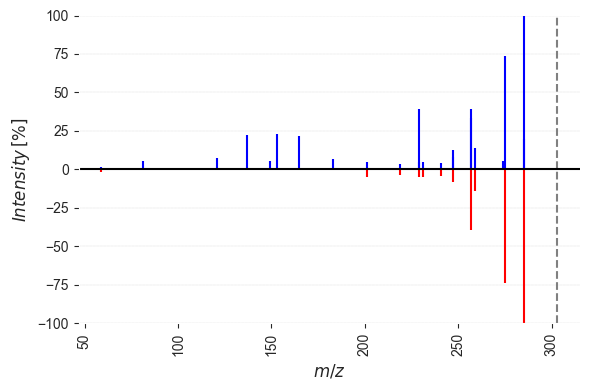

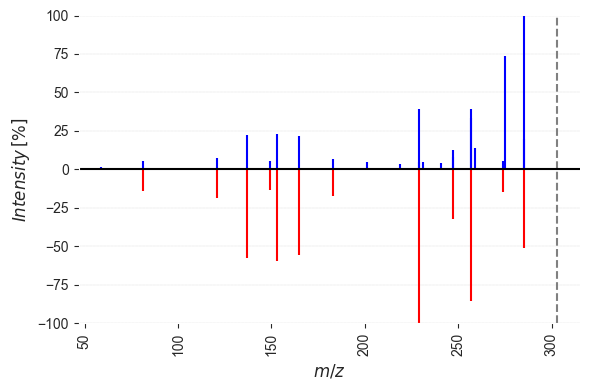

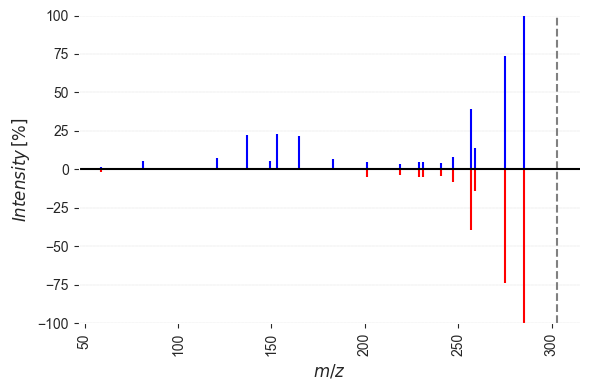

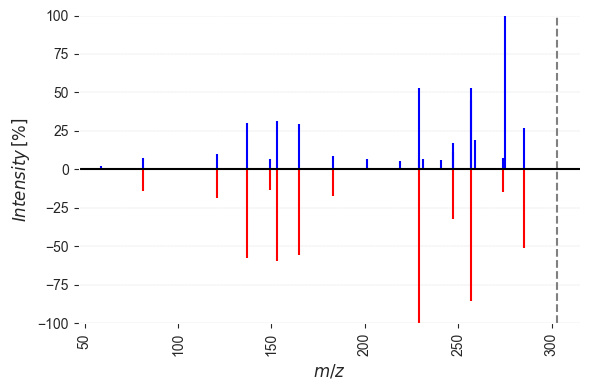

In [419]:
idx = 42
instance = result_df.loc[idx]
head_to_tail_plot(instance['msms_mix'], instance['msms_denoised'], pmz1=instance['reference_precursor_mz'], savepath=os.path.join(fig_dir, 'fig_'+str(idx)+'_mix_1_'+'_'+str(instance['es_1_mixture'])+'.png'))
head_to_tail_plot(instance['msms_mix'], instance['msms_transpose'], pmz1=instance['reference_precursor_mz'], savepath=os.path.join(fig_dir, 'fig_'+str(idx)+'_mix_2_'+str(instance['es_2_mixture'])+'.png'))
head_to_tail_plot(instance['msms_denoised_1'], instance['msms_denoised'], pmz1=instance['reference_precursor_mz'], savepath=os.path.join(fig_dir, 'fig_'+str(idx)+'_denoised_mix_1_'+str(instance['es_d1_mixture'])+'.png'))
head_to_tail_plot(instance['msms_denoised_2'], instance['msms_transpose'], pmz1=instance['reference_precursor_mz'], savepath=os.path.join(fig_dir, 'fig_'+str(idx)+'_denoised_mix_2_'+str(instance['es_d2_mixture'])+'.png'))

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

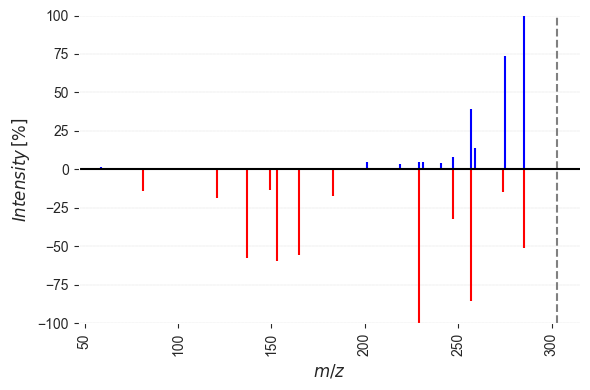

In [420]:
head_to_tail_plot(instance['msms_denoised'], instance['msms_transpose'], pmz1=instance['reference_precursor_mz'],
                  # savepath=os.path.join(fig_dir, 'fig_'+str(idx)+'_denoised_mix_2_'+str(instance['es_d2_mixture'])+'.png')\
                  )

In [393]:
library_high_quailty['key']=library_high_quailty['reference_name']+library_high_quailty['reference_adduct']

In [395]:
library_unique = library_high_quailty.drop_duplicates(subset = 'key')

In [409]:
allowed_percent_all = []
for index, row in tqdm(library_unique.iterrows(), total= len(library_unique)):
    # formula = de.prep_formula(row['reference_smiles'], row['reference_adduct'])
    all_possible_formulas = de.get_all_formulas(row['reference_formula'])

    all_allowed_formulas, all_allowed_masses = de.get_all_allowed_formula_mass(all_possible_formulas)
    all_allowed_fragments = [row['reference_precursor_mz']-x for x in all_allowed_masses]
    all_allowed_fragments = [x for x in all_allowed_fragments if x >= 50]
    all_allowed_fragments.sort()
    diff = np.diff(all_allowed_fragments)
    allowed_region = len(diff[diff>0.005*2])*0.005*2
    allowed_percent = allowed_region/row['reference_precursor_mz']*100
    allowed_percent_all.append(allowed_percent)
    # break
library_unique['allowed_percent']=allowed_percent_all


100%|██████████| 350/350 [04:18<00:00,  1.36it/s]


In [410]:
library_unique['allowed_percent'].describe()

count    350.000000
mean       6.197208
std        3.396369
min        0.747802
25%        3.365426
50%        5.796229
75%        8.351664
max       15.378465
Name: allowed_percent, dtype: float64

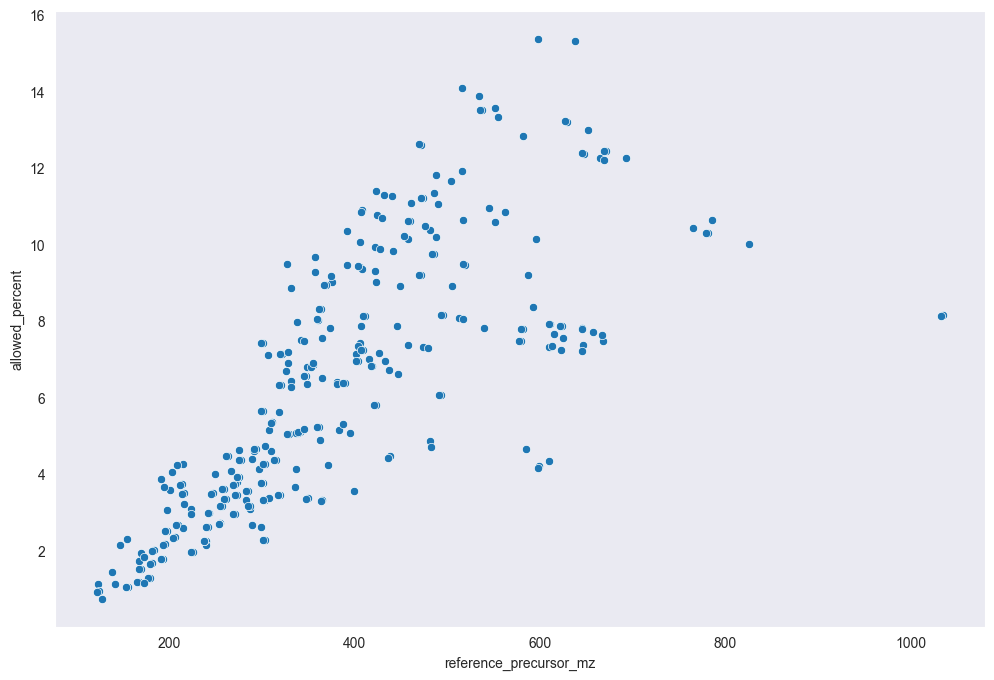

In [414]:
fig = plt.figure(figsize = (12, 8))#43
ax = fig.add_subplot()
#
sns.scatterplot(x = library_unique['reference_precursor_mz'], y = library_unique['allowed_percent'])
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=1.8, color = 'red')
plt.grid(False)
plt.savefig(os.path.join(fig_dir, 'allowed_percent_versus_pmz.png'))


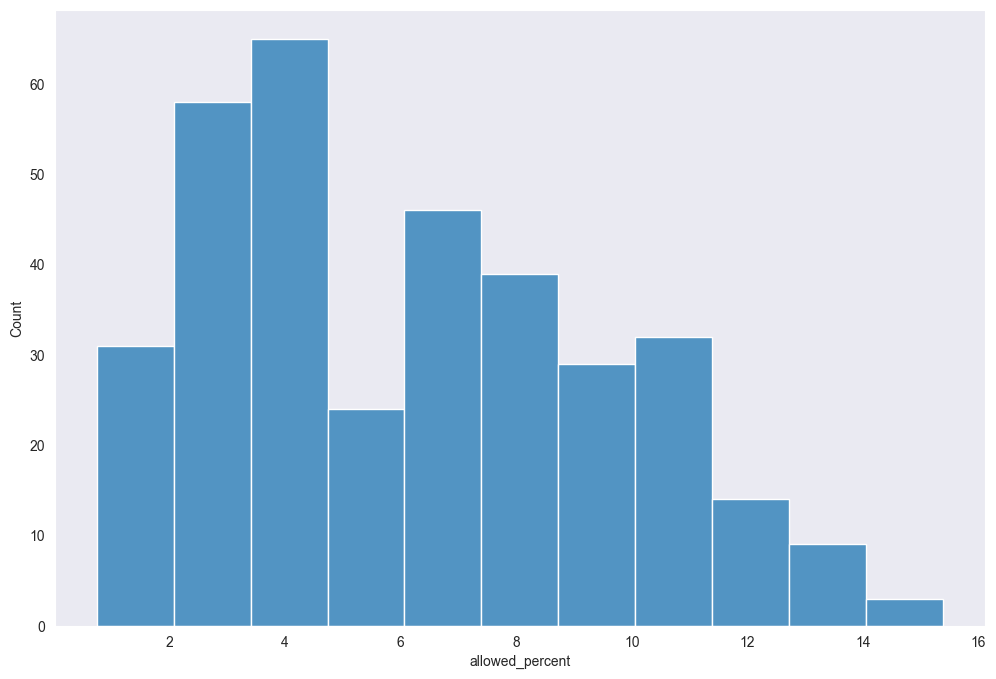

In [412]:
fig = plt.figure(figsize = (12, 8))#43
ax = fig.add_subplot()
#
sns.histplot(library_unique['allowed_percent'])
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=1.8, color = 'red')
plt.grid(False)
plt.savefig(os.path.join(fig_dir, 'allowed_percent.png'))


In [266]:
from toolsets.spectra_plotter import ms2_plot

In [259]:
from toolsets.flash_entropy_helper import flash_entropy_simple

In [292]:
flash_entropy_simple(msms1, msms_mixture, pmz = row['reference_precursor_mz'])

0.44898942

In [293]:
flash_entropy_simple(msms2, msms_mixture, pmz = row['reference_precursor_mz'])

0.7928983

In [212]:
len(result_df[result_df['ei_transpose']<90])/len(msms_denoised_transpose)

0.3157709561087167

In [213]:
result_df.sort_values(by = 'ei_transpose', ascending=True, inplace=True)

In [233]:
from toolsets.std_list_prep import calculate_precursormz

In [234]:
pmz_transpose = []
for index, row in result_df.iterrows():
    pmz_transpose.append(calculate_precursormz(row['smiles_transpose'], row['adduct_transpose']))

In [235]:
result_df['pmz_transpose']=pmz_transpose

In [236]:
result_df['pmz_diff']=abs(result_df['pmz_transpose']-result_df['reference_precursor_mz'])

In [237]:
result_df[result_df['pmz_diff']<1]

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,mode,reference_adduct,...,ei,normalized_entropy,spectral_entropy,key,ei_transpose,msms_denoised_transpose,smiles_transpose,adduct_transpose,pmz_transpose,pmz_diff
1606,Ellagic Acid,3,1,65,302.006267,5.00,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,C14H6O8,+,[M+H]+,...,97.79603,0.394693,2.982523,Ellagic Acid65[M+H]+,41.29559,81.03416\t19859.0\n121.02915\t26891.0\n137.023...,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,[M+H]+,303.049929,0.036385
4722,Ellagic Acid,3,1,35,302.006267,5.00,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,C14H6O8,+,[M+H]+,...,94.31941,0.176920,1.668561,Ellagic Acid35[M+H]+,41.29559,81.03416\t19859.0\n121.02915\t26891.0\n137.023...,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,[M+H]+,303.049929,0.036385
4121,Ellagic Acid,3,1,45,302.006267,5.00,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,C14H6O8,+,[M+H]+,...,96.69236,0.162546,1.686799,Ellagic Acid45[M+H]+,41.29559,81.03416\t19859.0\n121.02915\t26891.0\n137.023...,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,[M+H]+,303.049929,0.036385
1603,Ellagic Acid,3,1,65,302.006267,5.00,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,C14H6O8,+,[M+H]+,...,97.79603,0.394693,2.982523,Ellagic Acid65[M+H]+,50.75869,65.03861\t21747.0\n68.99729\t45884.0\n81.03392...,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,[M+H]+,303.049929,0.036385
4118,Ellagic Acid,3,1,45,302.006267,5.00,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,C14H6O8,+,[M+H]+,...,96.69236,0.162546,1.686799,Ellagic Acid45[M+H]+,50.75869,65.03861\t21747.0\n68.99729\t45884.0\n81.03392...,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,[M+H]+,303.049929,0.036385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900,"Cholic Acid, Methyl Ester",6,1,35,422.303224,10.53,COC(=O)CCC(C)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O...,C25H42O5,+,[M+NH4]+,...,98.83729,0.496232,3.825652,"Cholic Acid, Methyl Ester35[M+NH4]+",98.58312,53.00259\t240879.0\n53.03909\t400879.0\n55.054...,CC1(C)C(=O)C=CC2(C)C1CC(O)C1(C)C2CCC2(C)C(c3cc...,[M+H]+,441.227165,0.890117
5243,"Cholic Acid, Methyl Ester",6,1,45,422.303224,10.53,COC(=O)CCC(C)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O...,C25H42O5,+,[M+NH4]+,...,97.86212,0.737949,4.089571,"Cholic Acid, Methyl Ester45[M+NH4]+",98.58312,53.00259\t240879.0\n53.03909\t400879.0\n55.054...,CC1(C)C(=O)C=CC2(C)C1CC(O)C1(C)C2CCC2(C)C(c3cc...,[M+H]+,441.227165,0.890117
6512,Deacetylgedunin,2,1,35,440.219889,10.68,CC1(C)C(=O)C=CC2(C)C1CC(O)C1(C)C2CCC2(C)C(c3cc...,C26H32O6,+,[M+H]+,...,96.49951,0.651567,3.931983,Deacetylgedunin35[M+H]+,98.64481,53.03876\t70763.0\n55.05477\t649153.0\n67.0545...,COC(=O)CCC(C)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O...,[M+NH4]+,440.337047,0.890117
24,Deacetylgedunin,2,1,65,440.219889,10.68,CC1(C)C(=O)C=CC2(C)C1CC(O)C1(C)C2CCC2(C)C(c3cc...,C26H32O6,+,[M+H]+,...,98.58312,0.676704,3.612217,Deacetylgedunin65[M+H]+,98.64481,53.03876\t70763.0\n55.05477\t649153.0\n67.0545...,COC(=O)CCC(C)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O...,[M+NH4]+,440.337047,0.890117


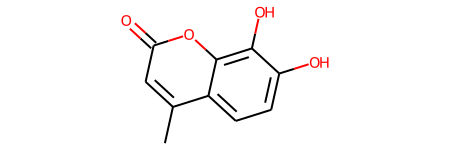

In [222]:
idx = 0
(Chem.MolFromSmiles(result_df.iloc[idx]['reference_smiles']))
# (Chem.MolFromSmiles(result_df.iloc[idx]['smiles_transpose']))

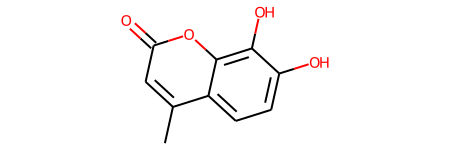

In [229]:
idx = 4
(Chem.MolFromSmiles(result_df.iloc[idx]['reference_smiles']))
# (Chem.MolFromSmiles(result_df.iloc[idx]['smiles_transpose']))

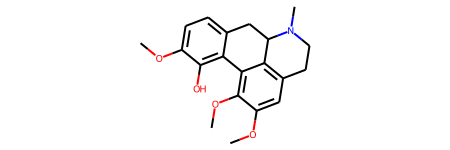

In [230]:
(Chem.MolFromSmiles(result_df.iloc[idx]['smiles_transpose']))

In [231]:
result_df


,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,mode,reference_adduct,...,recovery_percent(%),msms_denoised,ei,normalized_entropy,spectral_entropy,key,ei_transpose,msms_denoised_transpose,smiles_transpose,adduct_transpose
5613,4-Methyldaphnetin,6,1,35,192.042259,5.23,Cc1cc(=O)oc2c(O)c(O)ccc12,C10H8O4,+,[M+H]+,...,100.000000,81.03373\t357962.0\n88.01846\t261046.0\n89.038...,98.15937,0.021512,1.193829,4-Methyldaphnetin35[M+H]+,0.0,194.07301\t2372693.0\n207.08246\t2225370.0\n20...,COc1ccc2c(c1O)-c1c(OC)c(OC)cc3c1C(C2)N(C)CC3,[M+H]+
5614,4-Methyldaphnetin,6,1,35,192.042259,5.23,Cc1cc(=O)oc2c(O)c(O)ccc12,C10H8O4,+,[M+H]+,...,100.000000,81.03373\t357962.0\n88.01846\t261046.0\n89.038...,98.15937,0.021512,1.193829,4-Methyldaphnetin35[M+H]+,0.0,205.06554\t1512774.0\n207.08063\t1357884.0\n20...,COc1ccc2c(c1O)-c1c(OC)c(OC)cc3c1C(C2)N(C)CC3,[M+H]+
10950,Juglone,3,1,65,174.031694,10.23,O=C1C=CC(=O)c2c(O)cccc21,C10H6O3,-,[M-H]-,...,86.666667,66.01238\t2942.0\n101.0401\t9005.0\n145.02982\...,90.12544,0.043786,0.574645,Juglone65[M-H]-,0.0,179.05075\t7248.0\n180.03442\t4848.0\n180.0423...,O=c1c(O)c(-c2ccccc2)oc2ccccc12,[M-H]-
10951,Juglone,3,1,65,174.031694,10.23,O=C1C=CC(=O)c2c(O)cccc21,C10H6O3,-,[M-H]-,...,86.666667,66.01238\t2942.0\n101.0401\t9005.0\n145.02982\...,90.12544,0.043786,0.574645,Juglone65[M-H]-,0.0,179.05075\t7248.0\n180.03442\t4848.0\n180.0423...,O=c1cc(-c2ccccc2)oc2cccc(O)c12,[M-H]-
5611,4-Methyldaphnetin,6,1,35,192.042259,5.23,Cc1cc(=O)oc2c(O)c(O)ccc12,C10H8O4,+,[M+H]+,...,100.000000,81.03373\t357962.0\n88.01846\t261046.0\n89.038...,98.15937,0.021512,1.193829,4-Methyldaphnetin35[M+H]+,0.0,205.06615\t1124736.0\n208.08931\t1735902.0\n21...,COc1ccc2c(c1O)-c1c(OC)c(OC)cc3c1C(C2)N(C)CC3,[M+H]+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,Diosmetin,7,1,65,300.063388,7.44,COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1O,C16H12O6,-,[M-H]-,...,100.000000,63.02407\t5887500.0\n63.02676\t88154.0\n65.003...,99.24307,0.424660,3.261313,Diosmetin65[M-H]-,100.0,63.02403\t25754966.0\n63.02677\t346558.0\n64.9...,O=C1CC(c2ccc(O)cc2)Oc2cc(O)cc(O)c21,[M-H]-
10668,Tomatine,12,1,35,1033.545759,6.40,CC1CCC2(NC1)OC1CC3C4CCC5CC(OC6OC(CO)C(OC7OC(CO...,C50H83NO21,-,[M-H]-,...,81.818182,85.02985\t36326.0\n87.00908\t16654.0\n89.02464...,98.36365,0.397555,2.101191,Tomatine35[M-H]-,100.0,60.27905\t32365.0\n103.05563\t333053.0\n105.07...,COc1ccc(C=CC(=O)O)cc1OC,[M-H]-
9382,Hematein,6,1,45,300.063388,7.43,O=C1C=CC2=C3c4cc(O)c(O)cc4CC3(O)COC2=C1O,C16H12O6,-,[M-H]-,...,96.296296,63.02393\t9129.0\n65.00344\t6650.0\n83.01387\t...,98.56130,0.022249,1.323257,Hematein45[M-H]-,100.0,63.02403\t25754966.0\n63.02677\t346558.0\n64.9...,O=C1CC(c2ccc(O)cc2)Oc2cc(O)cc(O)c21,[M-H]-
11122,Camptothecin,3,1,65,348.111007,6.82,CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1,C20H16N2O4,-,[M-H]-,...,86.666667,57.06144\t38106.0\n79.05573\t85941.0\n108.0218...,93.75108,0.710516,2.872039,Camptothecin65[M-H]-,100.0,65.00335\t99445.0\n67.01912\t596936.0\n89.0396...,COc1ccc(C(=O)CC(=O)O)c2c1C=CC(C)(C)O2,[M-H]-


In [187]:
df_test= library_high_quailty.sample(20)

In [188]:
for index, row in tqdm(df_test.iterrows(), total= len(df_test)):
    result = de.denoise_h(row['msms'], row['reference_smiles'], row['reference_adduct'], reference_db_sorted)

100%|██████████| 20/20 [00:36<00:00,  1.82s/it]


In [189]:
for index, row in tqdm(df_test.iterrows(), total= len(df_test)):
    result = de.denoise_h(row['msms'], row['reference_smiles'], row['reference_adduct'], reference_db_sorted)

100%|██████████| 20/20 [00:01<00:00, 11.70it/s]


In [200]:
result_df

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,mode,reference_adduct,...,Precursor m/z,Height,ms1,msms,recovery_percent(%),msms_denoised,ei,normalized_entropy,spectral_entropy,key
0,Griseofulvic Acid,3,1,65,338.055716,7.760,COc1cc(OC)c2c(c1Cl)OC1(C(=O)CC(=O)CC1C)C2=O,C16H15ClO6,+,[M+H]+,...,339.0643,4.768473e+08,338.90234\t378421\n339.04297\t3593428\n339.047...,52.51847\t26381\n53.00279\t768443\n53.03917\t6...,97.142857,53.00279\t768443.0\n53.03917\t61871.0\n55.0183...,99.35133,0.137494,3.083992,Griseofulvic Acid65[M+H]+
1,Griseofulvic Acid,3,1,45,338.055716,7.760,COc1cc(OC)c2c(c1Cl)OC1(C(=O)CC(=O)CC1C)C2=O,C16H15ClO6,+,[M+H]+,...,339.0642,5.694356e+08,338.89743\t430914\n339.03693\t1542604\n339.043...,53.79744\t449172\n61.91573\t544489\n62.26662\t...,97.142857,69.03383\t51488524.0\n83.04927\t972146.0\n111....,96.30557,0.065239,1.397293,Griseofulvic Acid45[M+H]+
2,Griseofulvic Acid,3,1,35,338.055716,7.760,COc1cc(OC)c2c(c1Cl)OC1(C(=O)CC(=O)CC1C)C2=O,C16H15ClO6,+,[M+H]+,...,339.0643,6.661798e+08,339.02426\t558716\n339.0314\t892152\n339.03656...,53.00276\t379543\n53.25303\t136336\n57.25154\t...,100.000000,53.00276\t379543.0\n68.99764\t912347.0\n69.026...,99.51534,0.044291,1.753806,Griseofulvic Acid35[M+H]+
3,Bergenin,3,1,35,328.079432,3.790,COc1c(O)cc2c(c1O)C1OC(CO)C(O)C(O)C1OC2=O,C14H16O9,-,[M+Cl]-,...,363.0498,3.399544e+07,363.02631\t235674\n363.0498\t42373900\n364.053...,55.2112\t19635\n56.67587\t19027\n60.2365\t2015...,86.666667,75.02982\t21330.0\n100.11728\t23190.0\n143.948...,94.96219,0.212010,2.210600,Bergenin35[M+Cl]-
4,Griseofulvic Acid,3,1,35,338.055716,7.780,COc1cc(OC)c2c(c1Cl)OC1(C(=O)CC(=O)CC1C)C2=O,C16H15ClO6,-,[M-H]-,...,337.0493,2.776358e+08,336.87915\t660936\n337.02197\t968436\n337.0282...,56.29298\t185778\n59.46132\t198404\n61.18208\t...,86.666667,68.9983\t470288.0\n83.01403\t3999866.0\n84.058...,99.10296,0.052476,1.790206,Griseofulvic Acid35[M-H]-
5,Bergenin,3,1,45,328.079432,3.790,COc1c(O)cc2c(c1O)C1OC(CO)C(O)C(O)C1OC2=O,C14H16O9,-,[M+Cl]-,...,363.0500,2.718150e+07,363.04996\t32391396\n363.07367\t218261\n364.05...,51.66646\t14741\n60.12163\t16287\n72.09942\t15...,86.666667,60.12163\t16287.0\n72.09942\t15323.0\n73.01739...,97.07028,0.145769,1.931194,Bergenin45[M+Cl]-
6,Griseofulvic Acid,3,1,45,338.055716,7.780,COc1cc(OC)c2c(c1Cl)OC1(C(=O)CC(=O)CC1C)C2=O,C16H15ClO6,-,[M-H]-,...,337.0495,2.524593e+08,336.87997\t739685\n337.01062\t217638\n337.0159...,68.99829\t382454\n79.15429\t121184\n83.01405\t...,86.666667,68.99829\t382454.0\n83.01405\t2947504.0\n88.04...,98.72372,0.064043,1.979069,Griseofulvic Acid45[M-H]-
7,"2',4'-Dihydroxychalcone 4'-Glucoside",3,1,45,402.131468,7.840,O=C(C=Cc1ccccc1)c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1O,C21H22O8,-,[M+Cl]-,...,437.1021,1.633665e+07,436.97418\t143379\n437.10205\t20555260\n438.09...,51.3227\t8379\n55.87032\t9452\n56.78642\t9381\...,86.666667,62.97384\t8961.0\n91.01919\t44361.0\n108.02161...,98.06817,0.022254,1.047497,"2',4'-Dihydroxychalcone 4'-Glucoside45[M+Cl]-"
8,Pectolinarin,3,1,45,622.189770,6.630,COc1ccc(-c2cc(=O)c3c(O)c(OC)c(OC4OC(COC5OC(C)C...,C29H34O15,-,[M+Cl]-,...,657.1616,8.858990e+06,657.16156\t10304463\n658.13599\t72869\n658.164...,50.64532\t6648\n58.06408\t5510\n63.07914\t5701...,86.666667,58.06408\t5510.0\n63.07914\t5701.0\n87.15712\t...,96.87178,0.032747,1.082272,Pectolinarin45[M+Cl]-
9,Gibberellic Acid,12,1,65,346.141638,5.280,C=C1CC23CC1(O)CCC2C12C=CC(O)C(C)(C(=O)O1)C2C3C...,C19H22O6,-,[M+Cl]-,...,381.1118,8.546481e+06,381.11185\t8900495\n382.11526\t2154086\n383.10...,50.91477\t4953\n51.20516\t4969\n51.22215\t5307...,90.909091,52.03476\t5189.0\n55.01878\t8870.0\n57.03419\t...,96.01117,0.093556,1.844270,Gibberellic Acid65[M+Cl]-


In [185]:
pd.Series(ei_all_flattened).describe()

count    740.000000
mean      90.018991
std       20.768963
min        1.016130
25%       94.532630
50%       97.740980
75%       98.874830
max      100.000000
dtype: float64

In [149]:
search_against = quick_search_values(library_high_quailty, 'reference_rt', row['reference_rt']-10/60, row['reference_rt']+10/60, ifsorted=False)
search_against = string_search(search_against, 'reference_formula', row['reference_formula'],reverse=True)
search_against = string_search(search_against, 'mode', row['mode'])

In [152]:
ei_row

[99.14186,
 98.5813,
 99.08978,
 90.33242,
 93.29759,
 84.19602,
 64.77684,
 95.26,
 99.7801,
 98.72805,
 97.34908]

In [138]:
formula_temp = de.prep_formula(row['reference_smiles'],row['reference_adduct'])

In [140]:
check_inclusion('Na', formula_temp)

True

In [119]:
ei_all

[]

In [98]:
tt = de.denoise_h(search_against.iloc[0]['msms'], row['reference_smiles'], row['reference_adduct'], reference_db_sorted)

In [99]:
tt

('76.05721\t559086.0\n140.04988\t750604.0\n141.05701\t990633.0\n142.06552\t945396.0\n143.0733\t932316.0\n166.06575\t2254085.0\n167.06059\t982190.0\n167.07341\t2610539.0\n168.06882\t31102960.0\n168.0807\t1294647.0\n169.07622\t3988418.0\n178.06581\t720804.0\n180.08148\t4549620.0\n181.07664\t13350335.0\n182.08434\t2625721.0\n183.09172\t1293494.0\n191.07399\t3091261.0\n192.08173\t2537566.0\n193.08946\t1826523.0\n194.06003\t2180742.0\n194.08208\t1056711.0\n194.09851\t3978425.0\n196.07768\t1335342.0\n204.08162\t13087808.0\n205.07649\t25488268.0\n205.10548\t828502.0\n206.08435\t12451496.0\n206.0981\t9483382.0\n207.09212\t4324310.0\n208.06311\t1136251.0\n209.07146\t2474328.0\n209.10776\t1196728.0\n217.07613\t4090362.0\n217.09132\t3042492.0\n218.08372\t12596306.0\n222.0787\t1159392.0\n230.09859\t919274.0\n231.091\t4427828.0\n233.07164\t2721571.0\n233.10689\t4580087.0\n236.09457\t1101424.0\n242.0974\t940074.0\n244.09776\t3375235.0\n245.07144\t2019325.0\n245.10725\t3203800.0\n246.05487\t1573724.0

In [239]:
from molmass import Formula

In [251]:
from toolsets.mass_to_formula import MolecularFormula

In [256]:
from toolsets.denoising_related_functions import evaluate_nl_blacklist

In [263]:
evaluate_nl_blacklist('C2')

False

In [278]:
mol = MolecularFormula()
mol.from_string('O')

In [279]:
mol.get_data()

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [275]:
np.max(np.append(mol.get_data()[0:1], mol.get_data()[2:]))

0

In [318]:
reference_db_sorted['eva']=test

In [22]:
612/len(reference_db_sorted)

0.0001741560899567427

In [295]:
reference_db_sorted

,formstr,mass,dbe,charge,c,h,n,o,p,f,cl,br,i,s,si,b,se,na,k
0,H2,2.01565,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H4,4.03130,-1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0
2,H6,6.04695,-2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
3,H8,8.06260,-3,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C,12.00000,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514084,C42H83N3Se11,1508.74000,3,0,42,83,3,0,0,0,0,0,0,0,0,0,11,0,0
3514085,C30H50FN7O42P10,1508.93500,14,0,30,50,7,42,10,1,0,0,0,0,0,0,0,0,0
3514086,C31H55N3O49S8,1508.96700,6,0,31,55,3,49,0,0,0,0,0,8,0,0,0,0,0
3514087,B137H,1509.28300,69,0,0,1,0,0,0,0,0,0,0,0,0,137,0,0,0


In [230]:
mass_e = 0.00054857990924

In [238]:
mass_to_formula(108.49388+mass_e, 0.005)

['H64CO2', 'H63CNF']

In [233]:
mass_to_formula(95.00922+mass_e, 0.005)

['HC3N3O',
 'H3C5O2',
 'H3N2O4',
 'H2N3O2F',
 'H4C2O3F',
 'HCN2OF2',
 'H2C3F3',
 'H3OF4',
 'H2CN3ONa',
 'H4C3O2Na',
 'H3C3NFNa',
 'H5O3FNa',
 'H3CF3Na',
 'H5CO2Na2',
 'H4CNFNa2',
 'H4C5P',
 'H6CNO2P',
 'H3N3FP',
 'H5C2OFP',
 'H7CNP2',
 'H4CN2FS',
 'H6F3S',
 'H8O2NaS',
 'H8C2PS',
 'H9NaPS',
 'H4N4Cl',
 'H6C2NOCl',
 'H5C3FCl',
 'H6OF2Cl',
 'H7NONaCl',
 'H9FSCl',
 'H6C3NK',
 'H8O3K',
 'H6CF2K',
 'H7CNNaK']

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

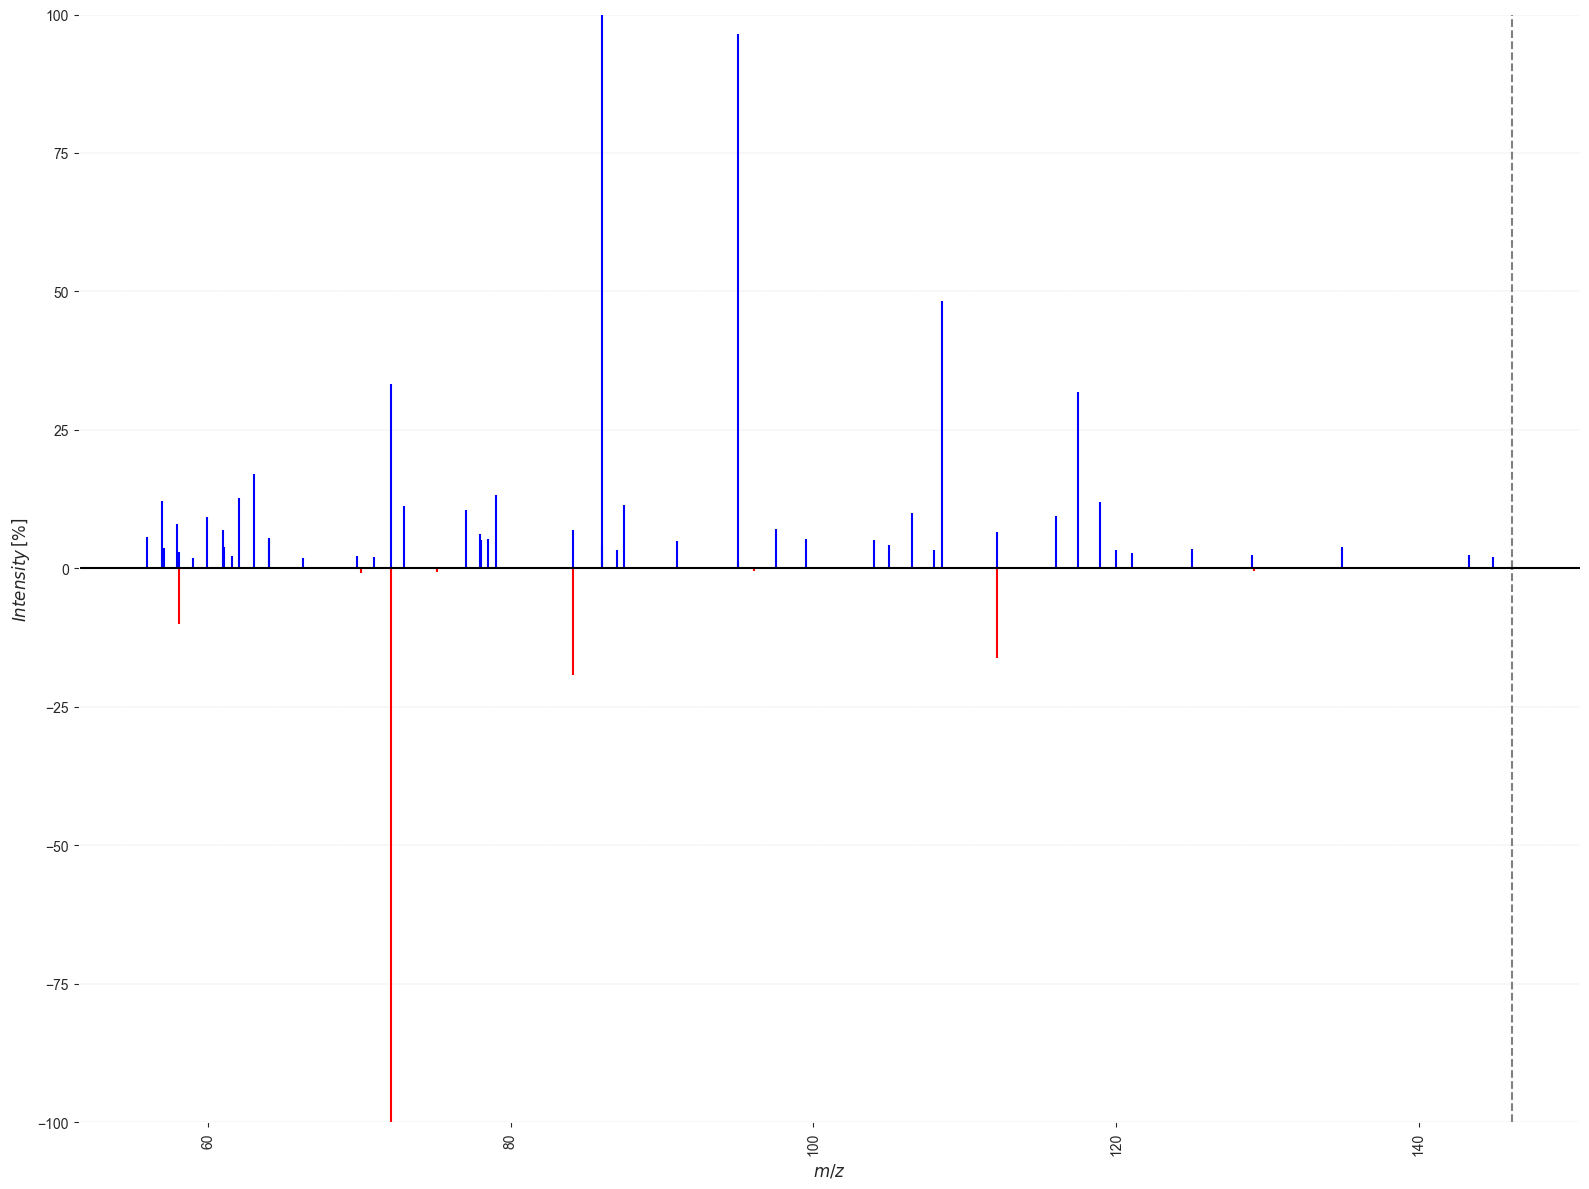

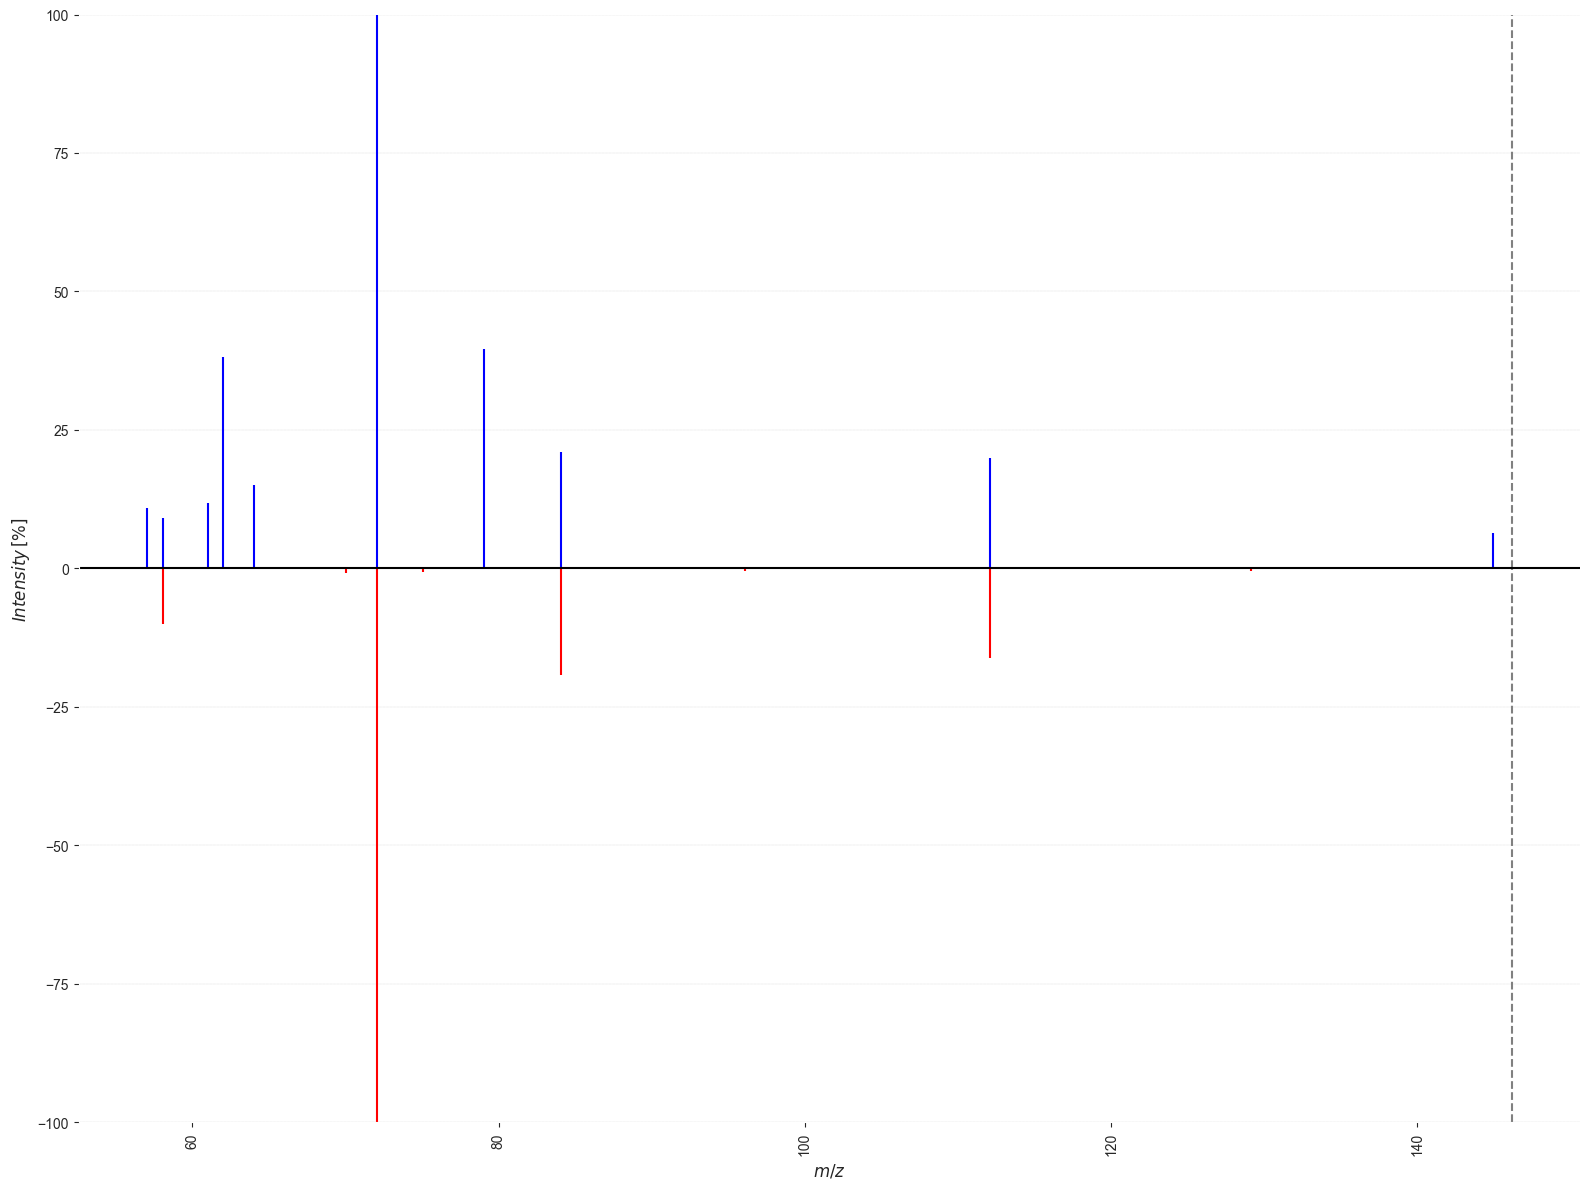

In [68]:
instance = mrm_dilutions_valid.iloc[1]
identity = string_search(library_high_quailty, 'key', instance['key'])
head_to_tail_plot(instance['msms'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(figs_dir, 'demo_fig_raw_'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_raw'])+'.png'))
head_to_tail_plot(instance['msms_denoised'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(figs_dir, 'demo_fig_denoised_'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_denoised'])+'.png'))

In [79]:
mrm_dilutions_valid

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,normalized_entropy,key,mrm_raw_1,mrm_raw_2,mrm_raw_3,raw_sum_temp,mrm_raw_intensity_sum,es_raw,es_denoised,diff
1080,SPERMIDINE,12,9,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,0.220961,SPERMIDINE65[M+H]+,"(72.0811, 0.07572669185456751)","(84.08104, 0.01650927963499953)","(112.11276, 0.009506565138212257)",0.101743,0.101743,0.270290,0.952640,0.682350
2323,SPERMIDINE,12,11,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,0.436283,SPERMIDINE65[M+H]+,"(72.08109, 0.057280545379748075)","(84.08097, 0.01202935530001763)","(112.11237, 0.011469821928810704)",0.080780,0.080780,0.211961,0.698268,0.486306
6216,SPERMIDINE,12,12,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,0.466127,SPERMIDINE65[M+H]+,"(72.08109, 0.05410928194862752)","(84.08114, 0.008612082917341005)","(112.11276, 0.007098676436027742)",0.069820,0.069820,0.172658,0.637076,0.464418
4534,Enoxolone,3,8,35,470.339610,12.19,CC1(C(=O)O)CCC2(C)CCC3(C)C(=CC(=O)C4C5(C)CCC(O...,C30H46O4,[M-H]-,469.332334,...,0.910607,Enoxolone35[M-H]-,"(425.34177, 0.16463284347475132)","(52.15036, 0.10258540870349707)","(52.15036, 0.10258540870349707)",0.369804,0.369804,0.407427,0.870221,0.462794
5492,TRIDESACETOXYKHIVORIN,9,7,35,460.246103,6.93,CC1(C)C(O)CC(O)C2(C)C1CC(O)C1(C)C2CCC2(C)C(c3c...,C26H36O7,[M+H]+,461.253379,...,0.963351,TRIDESACETOXYKHIVORIN35[M+H]+,"(359.18713, 0.17739400073214323)","(341.17346, 0)","(323.16354, 0)",0.177394,0.177394,0.281029,0.741246,0.460217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Tomatine,12,6,35,1033.545759,6.39,CC1CCC2(NC1)OC1CC3C4CCC5CC(OC6OC(CO)C(OC7OC(CO...,C50H83NO21,[M+H]+,1034.553035,...,0.630430,Tomatine35[M+H]+,"(85.02865, 0.11219743776747258)","(1016.54803, 0.08833733538825667)","(255.21121, 0.10826189263942976)",0.308797,0.308797,0.883513,0.853483,-0.030029
110,ACETYL ISOGAMBOGIC ACID,9,6,35,670.314183,13.92,CC(=O)Oc1c2c(c(CC=C(C)C)c3c1C(=O)C1=CC4CC5C(C)...,C40H46O9,[M+Na]+,693.303401,...,0.863796,ACETYL ISOGAMBOGIC ACID35[M+Na]+,"(525.19019, 0)","(483.17902, 0.2099457697494155)","(401.1019, 0)",0.209946,0.209946,0.254861,0.221884,-0.032977
4049,Gitoxin,12,4,35,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M-H]-,779.422331,...,0.218936,Gitoxin35[M-H]-,"(483.27676, 0.4076123614543115)","(613.3407, 0.15779067027981844)","(743.40826, 0.05309784017720078)",0.618501,0.618501,0.886579,0.848058,-0.038521
1813,Tomatine,12,2,35,1033.545759,6.39,CC1CCC2(NC1)OC1CC3C4CCC5CC(OC6OC(CO)C(OC7OC(CO...,C50H83NO21,[M+H]+,1034.553035,...,0.470588,Tomatine35[M+H]+,"(85.0287, 0.11088164142217719)","(1016.54761, 0.0840946796399165)","(255.21173, 0.07741134779879764)",0.272388,0.272388,0.959329,0.919448,-0.039881


In [86]:
mrm_dilutions_matched = mrm_dilutions_valid[mrm_dilutions_valid['es_denoised']>=0.7]

In [88]:
mrm_dilutions_matched.reset_index(inplace=True, drop=True)

In [89]:
mrm_dilutions_matched

,reference_name,reference_mix,conc,ce,reference_mono_mass,reference_rt,reference_smiles,reference_formula,reference_adduct,reference_precursor_mz,...,normalized_entropy,key,mrm_raw_1,mrm_raw_2,mrm_raw_3,raw_sum_temp,mrm_raw_intensity_sum,es_raw,es_denoised,diff
0,SPERMIDINE,12,9,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,0.220961,SPERMIDINE65[M+H]+,"(72.0811, 0.07572669185456751)","(84.08104, 0.01650927963499953)","(112.11276, 0.009506565138212257)",0.101743,0.101743,0.270290,0.952640,0.682350
1,Enoxolone,3,8,35,470.339610,12.19,CC1(C(=O)O)CCC2(C)CCC3(C)C(=CC(=O)C4C5(C)CCC(O...,C30H46O4,[M-H]-,469.332334,...,0.910607,Enoxolone35[M-H]-,"(425.34177, 0.16463284347475132)","(52.15036, 0.10258540870349707)","(52.15036, 0.10258540870349707)",0.369804,0.369804,0.407427,0.870221,0.462794
2,TRIDESACETOXYKHIVORIN,9,7,35,460.246103,6.93,CC1(C)C(O)CC(O)C2(C)C1CC(O)C1(C)C2CCC2(C)C(c3c...,C26H36O7,[M+H]+,461.253379,...,0.963351,TRIDESACETOXYKHIVORIN35[M+H]+,"(359.18713, 0.17739400073214323)","(341.17346, 0)","(323.16354, 0)",0.177394,0.177394,0.281029,0.741246,0.460217
3,SPERMIDINE,12,10,65,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,0.401097,SPERMIDINE65[M+H]+,"(72.08112, 0.17276917565174238)","(84.08103, 0.027947098507319086)","(112.11253, 0.021565447684008907)",0.222282,0.222282,0.412968,0.847258,0.434289
4,SPERMIDINE,12,11,45,145.157898,0.56,NCCCCNCCCN,C7H19N3,[M+H]+,146.165174,...,0.377646,SPERMIDINE45[M+H]+,"(72.08108, 0.10391586607459435)","(112.11253, 0.02437444071116214)","(84.08084, 0.006040319448899995)",0.134331,0.134331,0.302102,0.731311,0.429209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,Gitoxin,12,2,45,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M-H]-,779.422331,...,0.126823,Gitoxin45[M-H]-,"(483.27655, 0.42156834593073855)","(353.21317, 0.20666941055062377)","(613.34039, 0.05717559332945503)",0.685413,0.685413,0.981472,0.968402,-0.013069
4685,Gitoxin,12,3,45,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M+FA-H]-,825.427808,...,0.102048,Gitoxin45[M+FA-H]-,"(483.2767, 0.4627321495933439)","(353.21341, 0.17593178746347501)","(613.34058, 0.08364278774436391)",0.722307,0.722307,0.963203,0.945630,-0.017573
4686,Tomatine,12,6,35,1033.545759,6.39,CC1CCC2(NC1)OC1CC3C4CCC5CC(OC6OC(CO)C(OC7OC(CO...,C50H83NO21,[M+H]+,1034.553035,...,0.630430,Tomatine35[M+H]+,"(85.02865, 0.11219743776747258)","(1016.54803, 0.08833733538825667)","(255.21121, 0.10826189263942976)",0.308797,0.308797,0.883513,0.853483,-0.030029
4687,Gitoxin,12,4,35,780.429607,8.22,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,C41H64O14,[M-H]-,779.422331,...,0.218936,Gitoxin35[M-H]-,"(483.27676, 0.4076123614543115)","(613.3407, 0.15779067027981844)","(743.40826, 0.05309784017720078)",0.618501,0.618501,0.886579,0.848058,-0.038521


Acetosyringone


()

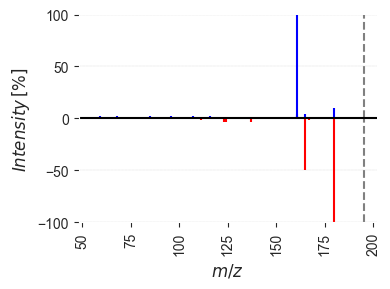

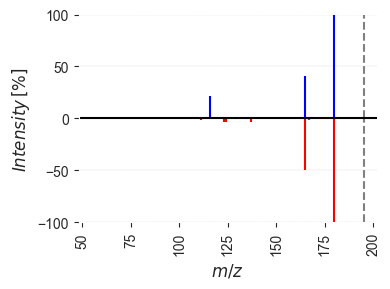

In [99]:
instance = mrm_dilutions_matched.iloc[6]
print(instance['reference_name'])
# print(instance[''])
identity = string_search(library_high_quailty, 'key', instance['key'])
head_to_tail_plot(instance['msms'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(figs_dir, 'demo_fig_raw_'+instance['key']+'_dilu_'+str(instance['conc'])+'s_'+str(instance['es_raw'])+'.png'), show=False)
head_to_tail_plot(instance['msms_denoised'], identity.iloc[0]['msms_denoised'], pmz1=instance['reference_precursor_mz'], pmz2=instance['reference_precursor_mz'],
                  savepath= os.path.join(figs_dir, 'demo_fig_denoised_'+instance['key']+'_dilu_'+str(instance['conc'])+'_s_'+str(instance['es_denoised'])+'.png'),show=False)